In [50]:
import pandas as pd

Identify your problem statement, find all your datasets, identify the questions you want to answer, reach out to polling/consulting firms to work with. 

Potential question--Why did these counties flip to Trump? 

Explore your data to understand it--drop data that is not relevant

 Look to predict something (next presidential election outcome).
 
Think about what would happen if more people became UNINSURED and the result that could have. 

Should slcie by margin of county flip. First-fourth quartiles

Look at population counts per county. 

Margin of victory/voting which way (Trump/Clinton) is more important to predict than simply whcih flipped (make that a subset)

A listing of the specific counties that flipped: 
http://www.npr.org/2016/11/15/502032052/lots-of-people-voted-for-obama-and-trump-heres-where-in-3-charts

Nate Silver postulates that education level is a key predctor. http://fivethirtyeight.com/features/education-not-income-predicted-who-would-vote-for-trump/?ex_cid=story-twitter 

Daily Kos article: http://www.dailykos.com/story/2017/1/30/1627319/-Daily-Kos-Elections-presents-the-2016-presidential-election-results-by-congressional-district

Diversity Index scource: https://www.kaggle.com/mikejohnsonjr/us-counties-diversity-index

In [51]:
election = pd.read_csv('2016_election.csv')

In [52]:
prev_election = pd.read_csv('2012_election.csv')

In [53]:
ui_change = pd.read_csv('County_Data_2016.csv')

In [54]:
div = pd.read_csv('diversityindex.csv')

In [55]:
edu = pd.read_excel('education_25_older_filt.xls')

Change in education the past 10 years--find the difference between them for each county

In [305]:
pop = pd.read_excel('us county populations.xls')

In [56]:
len(edu)

3283

In [301]:
len(pop)

3273

In [303]:
pop.dtypes

state               object
county              object
est_pop_2015         int64
pop_change_2015    float64
int_mig_2015       float64
dom_mig_2015       float64
mig_2015           float64
dtype: object

In [57]:
div.head()

,Location,Diversity-Index,"Black or African American alone, percent, 2013","American Indian and Alaska Native alone, percent, 2013","Asian alone, percent, 2013","Native Hawaiian and Other Pacific Islander alone, percent,","Two or More Races, percent, 2013","Hispanic or Latino, percent, 2013","White alone, not Hispanic or Latino, percent, 2013"
0,"Aleutians West Census Area, AK",0.769346,7.4,13.8,31.1,2.3,4.8,14.6,29.2
1,"Queens County, NY",0.742224,20.9,1.3,25.2,0.2,2.7,28.0,26.7
2,"Maui County, HI",0.740757,0.8,0.6,28.8,10.6,23.3,10.7,31.5
3,"Alameda County, CA",0.740399,12.4,1.2,28.2,1.0,5.2,22.7,33.2
4,"Aleutians East Borough, AK",0.738867,7.7,21.8,41.4,0.7,3.7,13.5,12.9


In [58]:
div = div.rename(columns={'Location':'county_state','Diversity-Index':'div_index','Black or African American alone, percent, 2013':'af_am','American Indian and Alaska Native alone, percent, 2013':'native_2013','Asian alone, percent, 2013':'asian_am','Native Hawaiian and Other Pacific Islander alone, percent,':'pac_am','Two or More Races, percent, 2013':'two_or_more_races','Hispanic or Latino, percent, 2013':'hisp_lat_am','White alone, not Hispanic or Latino, percent, 2013':'white_am'})

In [59]:
div.head()

,county_state,div_index,af_am,native_2013,asian_am,pac_am,two_or_more_races,hisp_lat_am,white_am
0,"Aleutians West Census Area, AK",0.769346,7.4,13.8,31.1,2.3,4.8,14.6,29.2
1,"Queens County, NY",0.742224,20.9,1.3,25.2,0.2,2.7,28.0,26.7
2,"Maui County, HI",0.740757,0.8,0.6,28.8,10.6,23.3,10.7,31.5
3,"Alameda County, CA",0.740399,12.4,1.2,28.2,1.0,5.2,22.7,33.2
4,"Aleutians East Borough, AK",0.738867,7.7,21.8,41.4,0.7,3.7,13.5,12.9


In [60]:
len(div)

3195

In [61]:
election.head()

,Unnamed: 0,votes_dem,votes_gop,total_votes,per_dem,per_gop,diff,per_point_diff,state_abbr,county_name,combined_fips
0,0,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2013
1,1,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2016
2,2,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2020
3,3,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2050
4,4,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2060


In [62]:
election.county_name.count()

3141

In [307]:
#Need to drop Alaska as it doesn't have any county names
election = election[election.county_name!='Alaska']
pop = pop[pop.county!='Alaska']

In [64]:
election.head()

,Unnamed: 0,votes_dem,votes_gop,total_votes,per_dem,per_gop,diff,per_point_diff,state_abbr,county_name,combined_fips
29,29,5908.0,18110.0,24661.0,0.239569,0.734358,"12,202",49.48%,AL,Autauga County,1001
30,30,18409.0,72780.0,94090.0,0.195653,0.773515,"54,371",57.79%,AL,Baldwin County,1003
31,31,4848.0,5431.0,10390.0,0.466603,0.522714,583,5.61%,AL,Barbour County,1005
32,32,1874.0,6733.0,8748.0,0.214220,0.769662,"4,859",55.54%,AL,Bibb County,1007
33,33,2150.0,22808.0,25384.0,0.084699,0.898519,"20,658",81.38%,AL,Blount County,1009


In [65]:
election = election.drop(election[[0,10]], axis=1)

In [66]:
election['county_state'] = election['county_name'] + ', ' + election['state_abbr']

In [67]:
prev_election['county_state'] = prev_election['county_name'] + ', ' + prev_election['state_abbr']

In [306]:
pop.head()

,state,county,est_pop_2015,pop_change_2015,int_mig_2015,dom_mig_2015,mig_2015
0,AL,Alabama,4858979,12568,5726,-2268,3458
1,AL,Autauga County,55347,57,19,-140,-121
2,AL,Baldwin County,203709,3996,221,3469,3690
3,AL,Barbour County,26489,-326,0,-281,-281
4,AL,Bibb County,22583,34,21,4,25


In [308]:
pop['county_state'] = pop['county'] + ', ' + pop['state']

In [68]:
election.head()

,votes_dem,votes_gop,total_votes,per_dem,per_gop,diff,per_point_diff,state_abbr,county_name,county_state
29,5908.0,18110.0,24661.0,0.239569,0.734358,"12,202",49.48%,AL,Autauga County,"Autauga County, AL"
30,18409.0,72780.0,94090.0,0.195653,0.773515,"54,371",57.79%,AL,Baldwin County,"Baldwin County, AL"
31,4848.0,5431.0,10390.0,0.466603,0.522714,583,5.61%,AL,Barbour County,"Barbour County, AL"
32,1874.0,6733.0,8748.0,0.214220,0.769662,"4,859",55.54%,AL,Bibb County,"Bibb County, AL"
33,2150.0,22808.0,25384.0,0.084699,0.898519,"20,658",81.38%,AL,Blount County,"Blount County, AL"


In [69]:
edu.head()

,FIPS Code,State,Area name,less_hs_diploma_2000,hs_diploma_only_2000,less_4_years_2000,four_or_ higher_2000,per_less_high_school diploma_2000,per_hs_diploma_only_2000,per_less_4_years_2000,per_four_or_ higher_2000,less_high_school_diploma_2011_15,hs_diploma_only_2011_15,less_4_years_2011_15,four_or_ higher_2011_15,per_less_high_school_diploma_2011_15,per_hs_diploma_only_2011_15,per_less_4_years_2011_15,per_four_or_higher_2011_15
0,0,US,United States,35715625.0,52168981.0,49864428.0,44462605.0,19.6,28.6,27.4,24.4,28229094.0,58722528.0,61558628.0,62952272.0,13.3,27.8,29.1,29.8
1,1000,AL,Alabama,714081.0,877216.0,746495.0,549608.0,24.7,30.4,25.9,19.0,509891.0,1005295.0,962515.0,761650.0,15.7,31.0,29.7,23.5
2,1001,AL,Autauga County,5872.0,9332.0,7413.0,4972.0,21.3,33.8,26.9,18.0,4656.0,12182.0,11044.0,8437.0,12.8,33.5,30.4,23.2
3,1003,AL,Baldwin County,17258.0,28428.0,28178.0,22146.0,18.0,29.6,29.3,23.1,14360.0,39431.0,43500.0,39710.0,10.5,28.8,31.8,29.0
4,1005,AL,Barbour County,6679.0,6124.0,4025.0,2068.0,35.3,32.4,21.3,10.9,5021.0,6490.0,4943.0,2354.0,26.7,34.5,26.3,12.5


In [309]:
pop.head()

,state,county,est_pop_2015,pop_change_2015,int_mig_2015,dom_mig_2015,mig_2015,county_state
0,AL,Alabama,4858979,12568,5726,-2268,3458,"Alabama, AL"
1,AL,Autauga County,55347,57,19,-140,-121,"Autauga County, AL"
2,AL,Baldwin County,203709,3996,221,3469,3690,"Baldwin County, AL"
3,AL,Barbour County,26489,-326,0,-281,-281,"Barbour County, AL"
4,AL,Bibb County,22583,34,21,4,25,"Bibb County, AL"


In [70]:
edu['county_state'] = edu['Area name'] + ', ' + edu['State']

In [71]:
edu.dtypes

FIPS Code                                 int64
State                                    object
Area name                                object
less_hs_diploma_2000                    float64
hs_diploma_only_2000                    float64
less_4_years_2000                       float64
four_or_ higher_2000                    float64
per_less_high_school diploma_2000       float64
per_hs_diploma_only_2000                float64
per_less_4_years_2000                   float64
per_four_or_ higher_2000                float64
less_high_school_diploma_2011_15        float64
hs_diploma_only_2011_15                 float64
less_4_years_2011_15                    float64
four_or_ higher_2011_15                 float64
per_less_high_school_diploma_2011_15    float64
per_hs_diploma_only_2011_15             float64
per_less_4_years_2011_15                float64
per_four_or_higher_2011_15              float64
county_state                             object
dtype: object

In [72]:
edu.isnull().sum()

FIPS Code                                0
State                                    0
Area name                                0
less_hs_diploma_2000                    11
hs_diploma_only_2000                    11
less_4_years_2000                       11
four_or_ higher_2000                    11
per_less_high_school diploma_2000       11
per_hs_diploma_only_2000                11
per_less_4_years_2000                   11
per_four_or_ higher_2000                11
less_high_school_diploma_2011_15        10
hs_diploma_only_2011_15                 10
less_4_years_2011_15                    10
four_or_ higher_2011_15                 10
per_less_high_school_diploma_2011_15    10
per_hs_diploma_only_2011_15             10
per_less_4_years_2011_15                10
per_four_or_higher_2011_15              10
county_state                             0
dtype: int64

In [73]:
edu = edu.dropna()

In [74]:
edu.isnull().sum()

FIPS Code                               0
State                                   0
Area name                               0
less_hs_diploma_2000                    0
hs_diploma_only_2000                    0
less_4_years_2000                       0
four_or_ higher_2000                    0
per_less_high_school diploma_2000       0
per_hs_diploma_only_2000                0
per_less_4_years_2000                   0
per_four_or_ higher_2000                0
less_high_school_diploma_2011_15        0
hs_diploma_only_2011_15                 0
less_4_years_2011_15                    0
four_or_ higher_2011_15                 0
per_less_high_school_diploma_2011_15    0
per_hs_diploma_only_2011_15             0
per_less_4_years_2011_15                0
per_four_or_higher_2011_15              0
county_state                            0
dtype: int64

In [75]:
len(edu)

3267

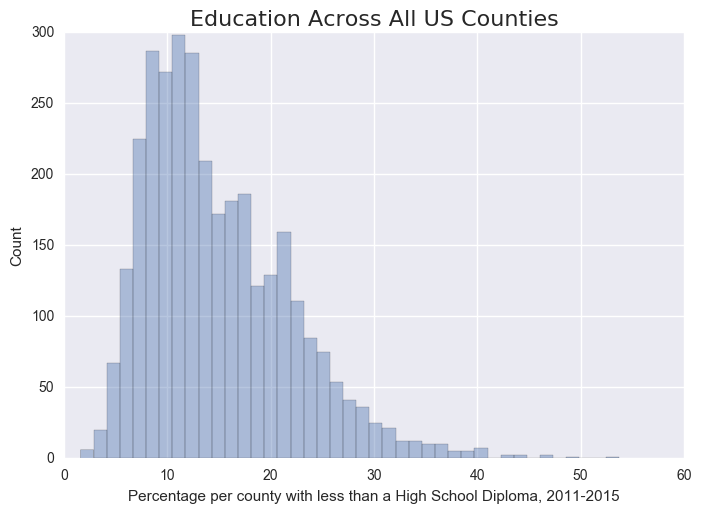

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.distplot(edu.per_less_high_school_diploma_2011_15, kde=False)
ax.set(xlabel='Percentage per county with less than a High School Diploma, 2011-2015', ylabel='Count')
ax.set_title('Education Across All US Counties', fontsize=16, fontname='Ubuntu')
plt.show()

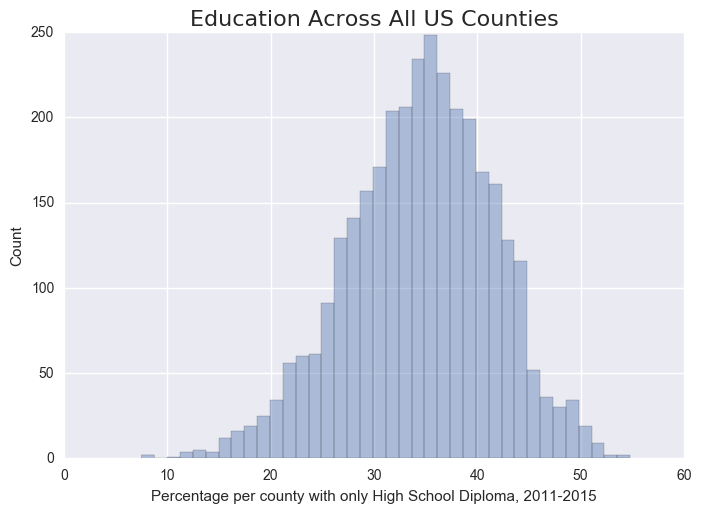

In [77]:
ax = sns.distplot(edu.per_hs_diploma_only_2011_15, kde=False)
ax.set(xlabel='Percentage per county with only High School Diploma, 2011-2015', ylabel='Count')
ax.set_title('Education Across All US Counties', fontsize=16, fontname='Ubuntu')
plt.show()

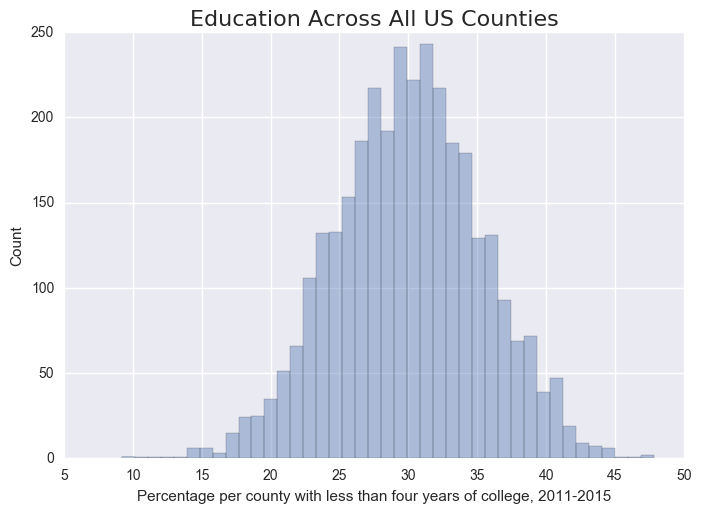

In [78]:
ax = sns.distplot(edu.per_less_4_years_2011_15, kde=False)
ax.set(xlabel='Percentage per county with less than four years of college, 2011-2015', ylabel='Count')
ax.set_title('Education Across All US Counties', fontsize=16, fontname='Ubuntu')
plt.show()

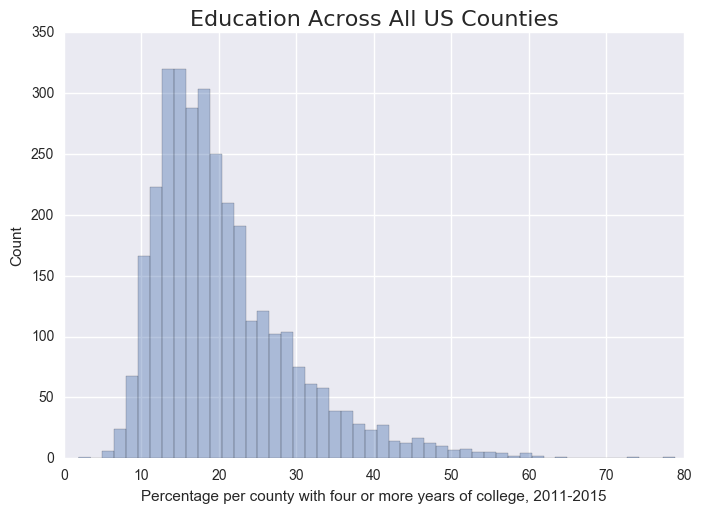

In [79]:
ax = sns.distplot(edu.per_four_or_higher_2011_15, kde=False)
ax.set(xlabel='Percentage per county with four or more years of college, 2011-2015', ylabel='Count')
ax.set_title('Education Across All US Counties', fontsize=16, fontname='Ubuntu')
plt.show()

In [80]:
election['per_dem'] = election['per_dem'].apply(lambda x: x*100)
election['per_gop'] = election['per_gop'].apply(lambda x: x*100)

In [81]:
prev_election['per_dem_2012'] = prev_election['per_dem_2012'].apply(lambda x: x*100)
prev_election['per_gop_2012'] = prev_election['per_gop_2012'].apply(lambda x: x*100)

In [82]:
election['per_point_diff'] = election['per_point_diff'].apply(lambda x: float(x.strip('%')))

In [83]:
# Making a new column for positive and negative--if per_dem is below 50%, negative. If
# above 50%, positive. 

In [84]:
election.head()

,votes_dem,votes_gop,total_votes,per_dem,per_gop,diff,per_point_diff,state_abbr,county_name,county_state
29,5908.0,18110.0,24661.0,23.956855,73.435789,"12,202",49.48,AL,Autauga County,"Autauga County, AL"
30,18409.0,72780.0,94090.0,19.565310,77.351472,"54,371",57.79,AL,Baldwin County,"Baldwin County, AL"
31,4848.0,5431.0,10390.0,46.660250,52.271415,583,5.61,AL,Barbour County,"Barbour County, AL"
32,1874.0,6733.0,8748.0,21.422039,76.966164,"4,859",55.54,AL,Bibb County,"Bibb County, AL"
33,2150.0,22808.0,25384.0,8.469902,89.851875,"20,658",81.38,AL,Blount County,"Blount County, AL"


In [85]:
election['election_range'] = election['per_dem'] - election['per_gop']

In [86]:
prev_election['election_range'] = prev_election['per_dem_2012'] - prev_election['per_gop_2012']

In [87]:
prev_election.dtypes

state_abbr              object
county_name             object
total_votes_2012         int64
votes_dem_2012           int64
votes_gop_2012           int64
county_fips              int64
state_fips               int64
per_dem_2012           float64
per_gop_2012           float64
diff_2012                int64
per_point_diff_2012    float64
county_state            object
election_range         float64
dtype: object

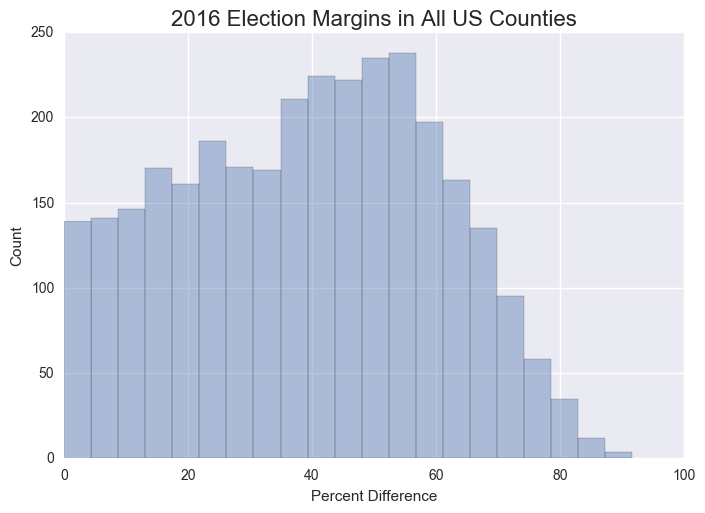

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.distplot(election.per_point_diff, kde=False)
ax.set(xlabel = "Percent Difference", ylabel='Count')
ax.set_title('2016 Election Margins in All US Counties', fontsize=16)
plt.show()

In [89]:
prev_election.head()

,state_abbr,county_name,total_votes_2012,votes_dem_2012,votes_gop_2012,county_fips,state_fips,per_dem_2012,per_gop_2012,diff_2012,per_point_diff_2012,county_state,election_range
0,AL,Autauga County,23909,6354,17366,1,1,26.575766,72.633736,11012,-0.460580,"Autauga County, AL",-46.057970
1,AL,Baldwin County,84988,18329,65772,3,1,21.566574,77.389749,47443,-0.558232,"Baldwin County, AL",-55.823175
2,AL,Barbour County,11459,5873,5539,5,1,51.252291,48.337551,334,0.029147,"Barbour County, AL",2.914739
3,AL,Bibb County,8391,2200,6131,7,1,26.218567,73.066381,3931,-0.468478,"Bibb County, AL",-46.847813
4,AL,Blount County,23980,2961,20741,9,1,12.347790,86.492911,17780,-0.741451,"Blount County, AL",-74.145121


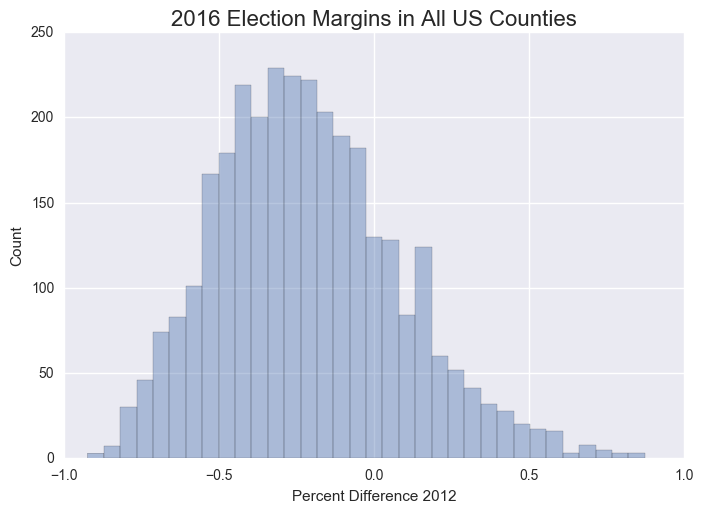

In [90]:
ax = sns.distplot(prev_election.per_point_diff_2012, kde=False)
ax.set(xlabel = "Percent Difference 2012", ylabel='Count')
ax.set_title('2016 Election Margins in All US Counties', fontsize=16)
plt.show()

In [92]:
import matplotlib.pyplot

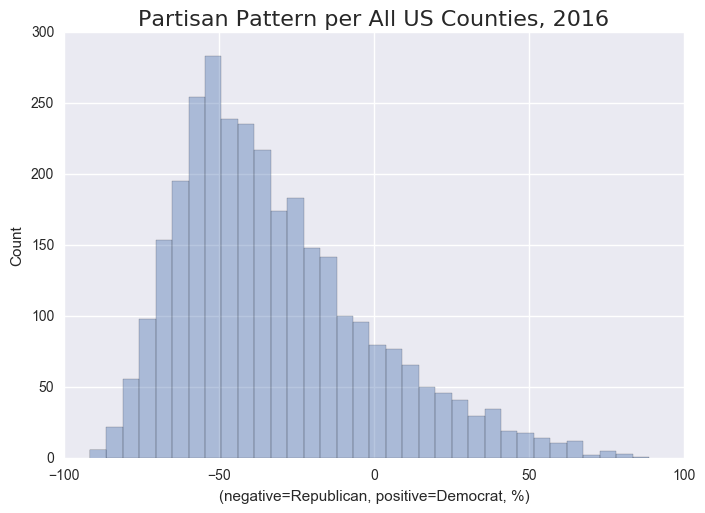

In [93]:
ax = sns.distplot(combined_5.election_range, kde=False)
ax.set(xlabel = "(negative=Republican, positive=Democrat, %)", ylabel='Count')
ax.set_title('Partisan Pattern per All US Counties, 2016', fontsize=16, fontname='Ubuntu')
plt.show()
# Democrats are in HUGE trouble. Of course, this distribution doesn't mean that they're 
# necessarily losing counties, but of those they held onto in 2016, they have a far, far
# weaker grasp on them than Republicans do on their side. Also, many of the Republican 
# counties are in Red States with few electoral votes. However, for Congressional voting
# this is still a dangerous sign. 

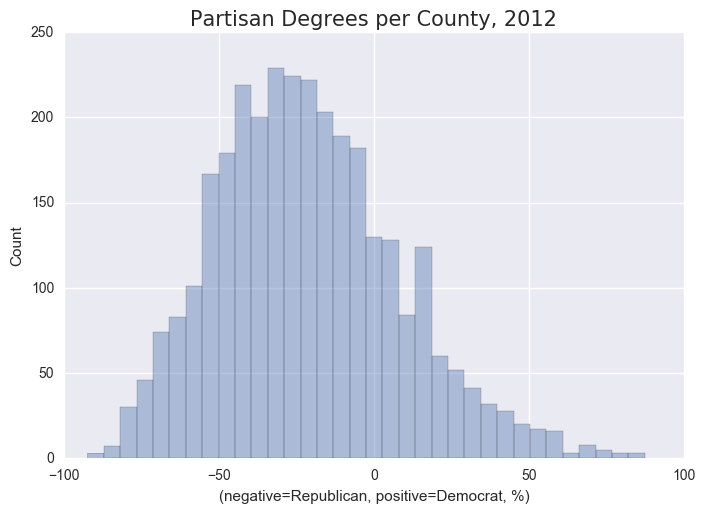

In [94]:
# What was it like in 2012? 
ax = sns.distplot(prev_election.election_range, kde=False)
ax.set(xlabel = "(negative=Republican, positive=Democrat, %)", ylabel='Count')
ax.set_title('Partisan Degrees per County, 2012', fontsize=15, fontname='Ubuntu')
plt.show()
# It was already bad. But it's clearly gotten worse for Democrats. 

In [95]:
election.describe()

,votes_dem,votes_gop,total_votes,per_dem,per_gop,per_point_diff,election_range
count,3.112000e+03,3112.000000,3.112000e+03,3112.000000,3112.000000,3112.000000,3112.000000
mean,2.006065e+04,19622.378856,4.174537e+04,31.708228,63.613409,39.233014,-31.905181
std,7.199807e+04,40442.737492,1.134048e+05,15.358601,15.651728,20.793041,30.883786
min,4.000000e+00,57.000000,6.400000e+01,3.144654,4.122067,0.040000,-91.636364
25%,1.166000e+03,3206.000000,4.820500e+03,20.475924,54.947846,22.467500,-54.689887
50%,3.153000e+03,7164.500000,1.094700e+04,28.473862,66.743096,40.315000,-38.217390
75%,9.608500e+03,17448.250000,2.879650e+04,39.999326,75.147062,55.462500,-14.876874
max,1.893770e+06,620285.000000,2.652072e+06,92.846592,95.272727,91.640000,88.724525


In [96]:
election['slight_dem'] = election['election_range'].apply(lambda x: 0< x <= 10)
election['slight_gop'] = election['election_range'].apply(lambda x: -10 <= x < 0)
election['med_dem'] = election['election_range'].apply(lambda x: 10< x <= 25)
election['med_gop'] = election['election_range'].apply(lambda x: -25 <= x < -10)
election['strong_dem'] = election['election_range'].apply(lambda x: 25 < x <= 50)
election['strong_gop'] = election['election_range'].apply(lambda x: -50 <= x < -25)

In [97]:
election.head()

,votes_dem,votes_gop,total_votes,per_dem,per_gop,diff,per_point_diff,state_abbr,county_name,county_state,election_range,slight_dem,slight_gop,med_dem,med_gop,strong_dem,strong_gop
29,5908.0,18110.0,24661.0,23.956855,73.435789,"12,202",49.48,AL,Autauga County,"Autauga County, AL",-49.478934,False,False,False,False,False,True
30,18409.0,72780.0,94090.0,19.565310,77.351472,"54,371",57.79,AL,Baldwin County,"Baldwin County, AL",-57.786162,False,False,False,False,False,False
31,4848.0,5431.0,10390.0,46.660250,52.271415,583,5.61,AL,Barbour County,"Barbour County, AL",-5.611165,False,True,False,False,False,False
32,1874.0,6733.0,8748.0,21.422039,76.966164,"4,859",55.54,AL,Bibb County,"Bibb County, AL",-55.544124,False,False,False,False,False,False
33,2150.0,22808.0,25384.0,8.469902,89.851875,"20,658",81.38,AL,Blount County,"Blount County, AL",-81.381973,False,False,False,False,False,False


In [98]:
ui_change.head()

,county_fips,county_name,state_abbrev,2013 uninsured rate,2016 uninsured rate,decrease from 2013 to 2016
0,1001,Autauga County,AL,17.0,8.0,-9.0
1,1003,Baldwin County,AL,17.0,8.0,-9.0
2,1005,Barbour County,AL,24.0,15.0,-9.0
3,1007,Bibb County,AL,20.0,10.0,-10.0
4,1009,Blount County,AL,19.0,10.0,-9.0


In [99]:
ui_change.county_name.count()

3238

In [100]:
ui_change = ui_change[ui_change.state_abbrev!='AK']

In [101]:
#Combine the states and counties into a single column.
# Have to find a way to join the dfs by matching up those with the same 
# county names AND the same state (there are countys with the same name)
# Simply concatenating them won't work.  

In [102]:
ui_change['county_state'] = ui_change['county_name'] + ', ' + ui_change['state_abbrev']

In [103]:
ui_change.head()

,county_fips,county_name,state_abbrev,2013 uninsured rate,2016 uninsured rate,decrease from 2013 to 2016,county_state
0,1001,Autauga County,AL,17.0,8.0,-9.0,"Autauga County, AL"
1,1003,Baldwin County,AL,17.0,8.0,-9.0,"Baldwin County, AL"
2,1005,Barbour County,AL,24.0,15.0,-9.0,"Barbour County, AL"
3,1007,Bibb County,AL,20.0,10.0,-10.0,"Bibb County, AL"
4,1009,Blount County,AL,19.0,10.0,-9.0,"Blount County, AL"


In [104]:
ue_rates = pd.read_excel('Unemployment Rates.xlsx')
ue_rates = ue_rates.drop(ue_rates[[0,1,2,4,5]],axis=1)
ue_rates = ue_rates.rename(columns={'Unnamed: 3':'county_state','Unnamed: 6':'labor_force', 'Unnamed: 7':'employed','Unnamed: 8':'unemployed','Unnamed: 9':'ue_rate'})
ue_rates = ue_rates.drop(ue_rates.index[[0,1,2,3,4]])

In [105]:
#http://www.cnbc.com/heres-a-map-of-the-us-counties-that-flipped-to-trump-from-democrats/ 

In [106]:
ue_rates.head()

,county_state,labor_force,employed,unemployed,ue_rate
5,"Autauga County, AL",25308,23981,1327,5.2
6,"Baldwin County, AL",87316,82525,4791,5.5
7,"Barbour County, AL",8625,7854,771,8.9
8,"Bibb County, AL",8490,7929,561,6.6
9,"Blount County, AL",24352,23036,1316,5.4


In [107]:
ue_rates.columns

Index([u'county_state', u'labor_force', u'employed', u'unemployed',
       u'ue_rate'],
      dtype='object')

In [108]:
ue_rates.dtypes

county_state    object
labor_force     object
employed        object
unemployed      object
ue_rate         object
dtype: object

In [109]:
ue_rates.labor_force = ue_rates.labor_force.astype(float)
ue_rates.employed =  ue_rates.employed.astype(float)
ue_rates.unemployed =  ue_rates.unemployed.astype(float)
ue_rates.ue_rate =  ue_rates.ue_rate.astype(float)

In [110]:
ue_rates.dtypes

county_state     object
labor_force     float64
employed        float64
unemployed      float64
ue_rate         float64
dtype: object

In [111]:
ui_change.head()

,county_fips,county_name,state_abbrev,2013 uninsured rate,2016 uninsured rate,decrease from 2013 to 2016,county_state
0,1001,Autauga County,AL,17.0,8.0,-9.0,"Autauga County, AL"
1,1003,Baldwin County,AL,17.0,8.0,-9.0,"Baldwin County, AL"
2,1005,Barbour County,AL,24.0,15.0,-9.0,"Barbour County, AL"
3,1007,Bibb County,AL,20.0,10.0,-10.0,"Bibb County, AL"
4,1009,Blount County,AL,19.0,10.0,-9.0,"Blount County, AL"


In [112]:
ui_change.head()

,county_fips,county_name,state_abbrev,2013 uninsured rate,2016 uninsured rate,decrease from 2013 to 2016,county_state
0,1001,Autauga County,AL,17.0,8.0,-9.0,"Autauga County, AL"
1,1003,Baldwin County,AL,17.0,8.0,-9.0,"Baldwin County, AL"
2,1005,Barbour County,AL,24.0,15.0,-9.0,"Barbour County, AL"
3,1007,Bibb County,AL,20.0,10.0,-10.0,"Bibb County, AL"
4,1009,Blount County,AL,19.0,10.0,-9.0,"Blount County, AL"


In [113]:
right = election.set_index('county_state')
left = ue_rates.set_index('county_state')
combined_1 = left.join(right, lsuffix='', rsuffix='_r')
combined_1 = combined_1.reset_index()

In [114]:
ui_change = ui_change.rename(columns={'2013 uninsured rate':'2013_ui_rate', '2016 uninsured rate':'2016_ui_rate','decrease from 2013 to 2016':'ui_delta'})

In [115]:
right = combined_1.set_index('county_state')
left = ui_change.set_index('county_state')
combined_2 = left.join(right, lsuffix='', rsuffix = '_r')
combined_2 = combined_2.reset_index()

In [116]:
right = combined_2.set_index('county_state')
left = div.set_index('county_state')
combined_3 = left.join(right, lsuffix='', rsuffix = '_r')
combined_3 = combined_3.reset_index()

In [117]:
right = combined_3.set_index('county_state')
left = edu.set_index('county_state')
combined_4 = left.join(right, lsuffix='', rsuffix = '_r')
combined_4 = combined_4.reset_index()

In [376]:
right = combined_4.set_index('county_state')
left = pop.set_index('county_state')
combined_5 = left.join(right, lsuffix='', rsuffix = '_r')
combined_5 = combined_5.reset_index()

In [499]:
combined_5.isnull().sum()

county_state                            0
state                                   0
county                                  0
est_pop_2015                            0
pop_change_2015                         0
int_mig_2015                            0
dom_mig_2015                            0
mig_2015                                0
FIPS Code                               0
State                                   0
Area name                               0
less_hs_diploma_2000                    0
hs_diploma_only_2000                    0
less_4_years_2000                       0
four_or_ higher_2000                    0
per_less_high_school diploma_2000       0
per_hs_diploma_only_2000                0
per_less_4_years_2000                   0
per_four_or_ higher_2000                0
less_high_school_diploma_2011_15        0
hs_diploma_only_2011_15                 0
less_4_years_2011_15                    0
four_or_ higher_2011_15                 0
per_less_high_school_diploma_2011_

In [498]:
combined_5.dropna(inplace=True)

In [377]:
combined_5 = combined_5[combined_5.county_name_r!='Alaska']
#Just making sure Alaska isn't included

In [378]:
combined_5.head()

,county_state,state,county,est_pop_2015,pop_change_2015,int_mig_2015,dom_mig_2015,mig_2015,FIPS Code,State,...,per_point_diff,state_abbr,county_name_r,election_range,slight_dem,slight_gop,med_dem,med_gop,strong_dem,strong_gop
0,"Abbeville County, SC",SC,Abbeville County,24932,6,22,-12,10,45001.0,SC,...,28.25,SC,Abbeville County,-28.254383,False,False,False,False,False,True
1,"Acadia Parish, LA",LA,Acadia Parish,62577,79,32,-281,-249,22001.0,LA,...,56.67,LA,Acadia Parish,-56.674943,False,False,False,False,False,False
2,"Accomack County, VA",VA,Accomack County,32973,-25,81,-53,28,51001.0,VA,...,11.71,VA,Accomack County,-11.710568,False,False,False,True,False,False
3,"Ada County, ID",ID,Ada County,434211,7364,933,3838,4771,16001.0,ID,...,9.24,ID,Ada County,-9.239878,False,True,False,False,False,False
4,"Adair County, IA",IA,Adair County,7228,-189,0,-161,-161,19001.0,IA,...,35.36,IA,Adair County,-35.355148,False,False,False,False,False,True


In [120]:
election.describe()

,votes_dem,votes_gop,total_votes,per_dem,per_gop,per_point_diff,election_range
count,3.112000e+03,3112.000000,3.112000e+03,3112.000000,3112.000000,3112.000000,3112.000000
mean,2.006065e+04,19622.378856,4.174537e+04,31.708228,63.613409,39.233014,-31.905181
std,7.199807e+04,40442.737492,1.134048e+05,15.358601,15.651728,20.793041,30.883786
min,4.000000e+00,57.000000,6.400000e+01,3.144654,4.122067,0.040000,-91.636364
25%,1.166000e+03,3206.000000,4.820500e+03,20.475924,54.947846,22.467500,-54.689887
50%,3.153000e+03,7164.500000,1.094700e+04,28.473862,66.743096,40.315000,-38.217390
75%,9.608500e+03,17448.250000,2.879650e+04,39.999326,75.147062,55.462500,-14.876874
max,1.893770e+06,620285.000000,2.652072e+06,92.846592,95.272727,91.640000,88.724525


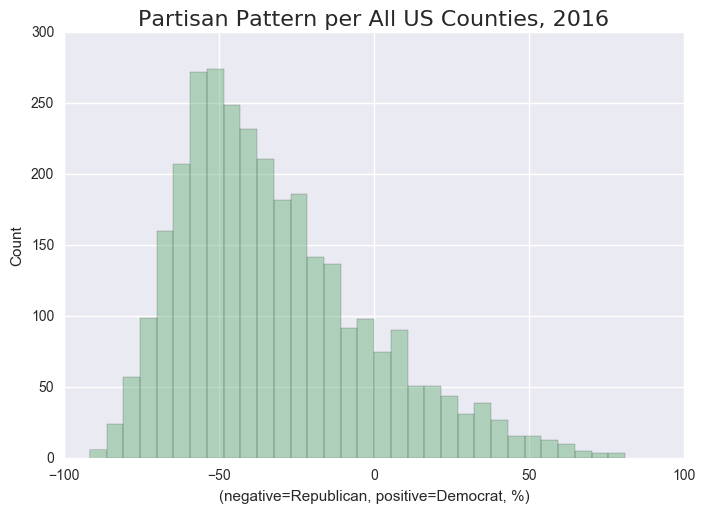

In [500]:
# Set up range variables
color = 
ax = sns.distplot(combined_5.election_range, kde=False)
ax.set(xlabel = "(negative=Republican, positive=Democrat, %)", ylabel='Count')
ax.set_title('Partisan Pattern per All US Counties, 2016', fontsize=16, fontname='Ubuntu')
plt.show()

In [313]:
len(combined_5)

3272

In [314]:
combined_5.columns

Index([                          u'county_state',
                                    u'FIPS Code',
                                        u'State',
                                    u'Area name',
                         u'less_hs_diploma_2000',
                         u'hs_diploma_only_2000',
                            u'less_4_years_2000',
                         u'four_or_ higher_2000',
            u'per_less_high_school diploma_2000',
                     u'per_hs_diploma_only_2000',
                        u'per_less_4_years_2000',
                     u'per_four_or_ higher_2000',
             u'less_high_school_diploma_2011_15',
                      u'hs_diploma_only_2011_15',
                         u'less_4_years_2011_15',
                      u'four_or_ higher_2011_15',
         u'per_less_high_school_diploma_2011_15',
                  u'per_hs_diploma_only_2011_15',
                     u'per_less_4_years_2011_15',
                   u'per_four_or_higher_2011_15',


In [124]:
# All counties, not including those in Alaska.

In [445]:
virginia = combined_5[combined_5.state_abbr=='VA']
virginia.head()

,county_state,state,county,est_pop_2015,pop_change_2015,int_mig_2015,dom_mig_2015,mig_2015,FIPS Code,State,...,per_point_diff,state_abbr,county_name_r,election_range,slight_dem,slight_gop,med_dem,med_gop,strong_dem,strong_gop
2,"Accomack County, VA",VA,Accomack County,32973,-25,81,-53,28,51001.0,VA,...,11.71,VA,Accomack County,-11.710568,False,False,False,True,False,False
30,"Albemarle County, VA",VA,Albemarle County,105703,1352,410,675,1085,51003.0,VA,...,25.06,VA,Albemarle County,25.056116,False,False,False,False,True,False
37,"Alexandria city, VA",VA,Alexandria city,153511,2071,2334,-2139,195,51510.0,VA,...,59.03,VA,Alexandria city,59.026135,False,False,False,False,False,False
45,"Alleghany County, VA",VA,Alleghany County,15677,-207,2,-85,-83,51005.0,VA,...,37.07,VA,Alleghany County,-37.065426,False,False,False,False,False,True
56,"Amelia County, VA",VA,Amelia County,12903,118,8,123,131,51007.0,VA,...,36.30,VA,Amelia County,-36.304193,False,False,False,False,False,True


In [446]:
# Making swing state list based on the crucial swing states this election.

IA = combined_5[combined_5['state_abbr']==('IA')]
WI = combined_5[combined_5['state_abbr']==('WI')]
MI = combined_5[combined_5['state_abbr']==('MI')]
PA = combined_5[combined_5['state_abbr']==('PA')]
FL = combined_5[combined_5['state_abbr']==('FL')]
NC = combined_5[combined_5['state_abbr']==('NC')]
OH = combined_5[combined_5['state_abbr']==('OH')]
MN = combined_5[combined_5['state_abbr']==('MN')]
swing_states= pd.concat([IA, WI, MI, PA, FL, NC, OH, MN])
# 'IA', 'WI','MI','PA','FL','NC','OH','MN'

In [447]:
swing_states.head()

,county_state,state,county,est_pop_2015,pop_change_2015,int_mig_2015,dom_mig_2015,mig_2015,FIPS Code,State,...,per_point_diff,state_abbr,county_name_r,election_range,slight_dem,slight_gop,med_dem,med_gop,strong_dem,strong_gop
4,"Adair County, IA",IA,Adair County,7228,-189,0,-161,-161,19001.0,IA,...,35.36,IA,Adair County,-35.355148,False,False,False,False,False,True
9,"Adams County, IA",IA,Adams County,3796,-75,0,-80,-80,19003.0,IA,...,39.77,IA,Adams County,-39.769452,False,False,False,False,False,True
40,"Allamakee County, IA",IA,Allamakee County,13886,-175,21,-216,-195,19005.0,IA,...,24.32,IA,Allamakee County,-24.323534,False,False,False,True,False,False
75,"Appanoose County, IA",IA,Appanoose County,12529,-99,-2,-61,-63,19007.0,IA,...,36.38,IA,Appanoose County,-36.384514,False,False,False,False,False,True
106,"Audubon County, IA",IA,Audubon County,5773,-20,0,-19,-19,19009.0,IA,...,31.25,IA,Audubon County,-31.251850,False,False,False,False,False,True


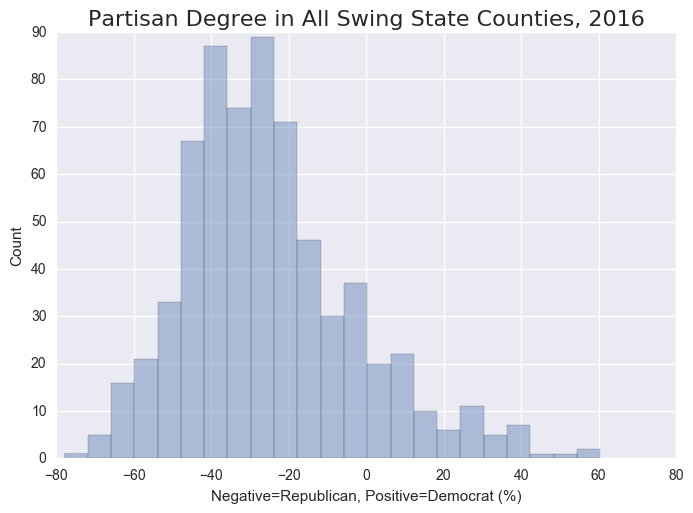

In [128]:
ax = sns.distplot(swing_states.election_range, kde=False)
ax.set(xlabel = "Negative=Republican, Positive=Democrat (%)", ylabel='Count')
ax.set_title('Partisan Degree in All Swing State Counties, 2016', fontsize=16, fontname='Ubuntu')
plt.show()
# As expected, in swing states it's not AS bad for Democrats compared to the rest of the 
# country but still quite dire. 

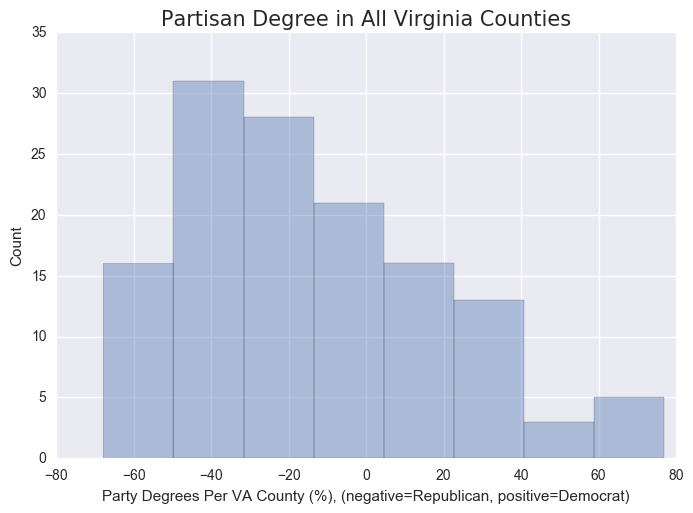

In [129]:
VA = combined_4[combined_4['state_abbr']==('VA')]
ax = sns.distplot(VA.election_range, kde=False)
ax.set(xlabel = "Party Degrees Per VA County (%), (negative=Republican, positive=Democrat)", ylabel='Count')
ax.set_title('Partisan Degree in All Virginia Counties', fontsize=15, fontname='Ubuntu')
plt.show()

# Influence of Ethnicity 

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

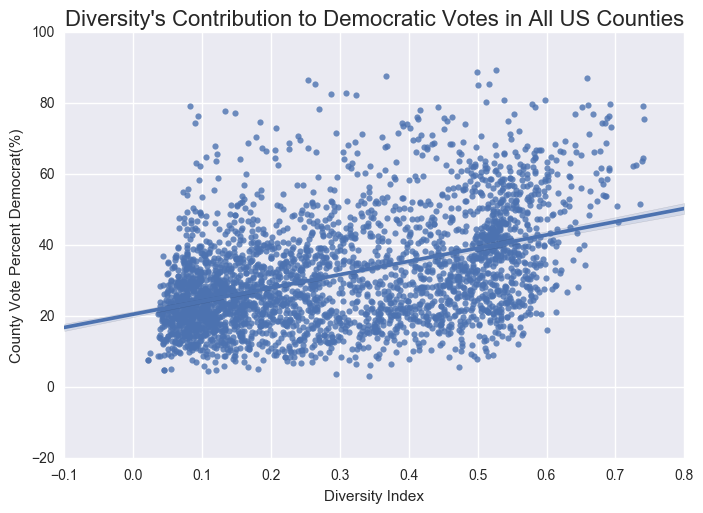

In [317]:
ax = sns.regplot(combined_5.div_index, combined_5.per_dem)
ax.set(xlabel = 'Diversity Index', ylabel = 'County Vote Percent Democrat(%)')
ax.set_title("Diversity's Contribution to Democratic Votes in All US Counties", fontsize=16)
plt.show()

In [133]:
# Divide up the two clusters in these graphs.

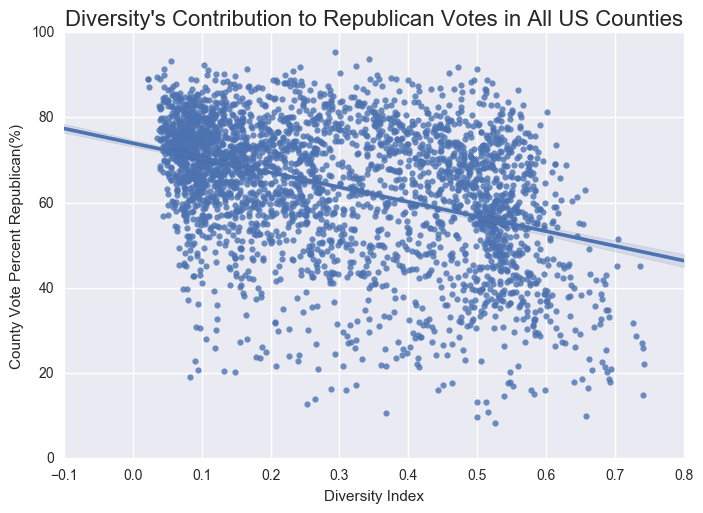

In [318]:
ax = sns.regplot(combined_5.div_index, combined_5.per_gop)
ax.set(xlabel = 'Diversity Index', ylabel = 'County Vote Percent Republican(%)')
ax.set_title("Diversity's Contribution to Republican Votes in All US Counties", fontsize=16)
plt.show()

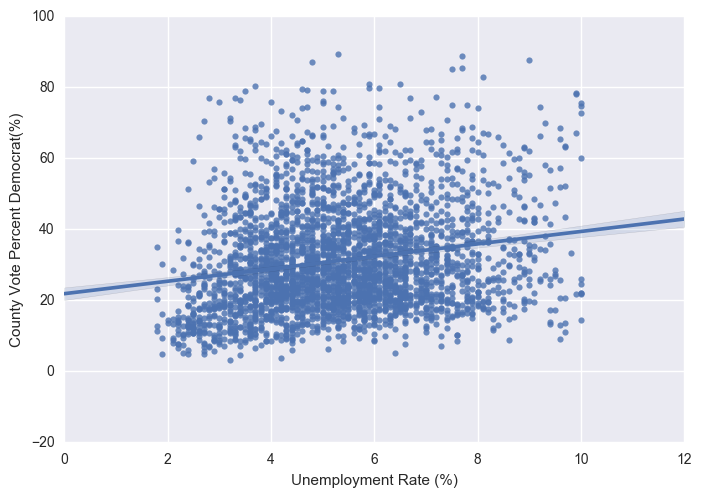

In [319]:
ue_rate_filt = combined_5[combined_5.ue_rate<=10]
ax = sns.regplot(ue_rate_filt.ue_rate, ue_rate_filt.per_dem)
ax.set(xlabel = 'Unemployment Rate (%)', ylabel = 'County Vote Percent Democrat(%)')
plt.show()
# Unemployment is not a good indicator of voting either way. 

In [136]:
# Unemployment rate not indicative one way or the other. 

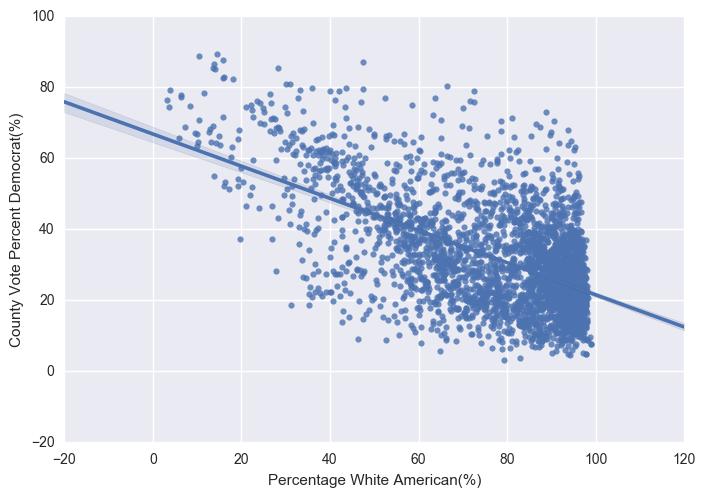

In [320]:
ax = sns.regplot(combined_5.white_am, combined_5.per_dem)
ax.set(xlabel = 'Percentage White American(%)', ylabel = 'County Vote Percent Democrat(%)')
plt.show()

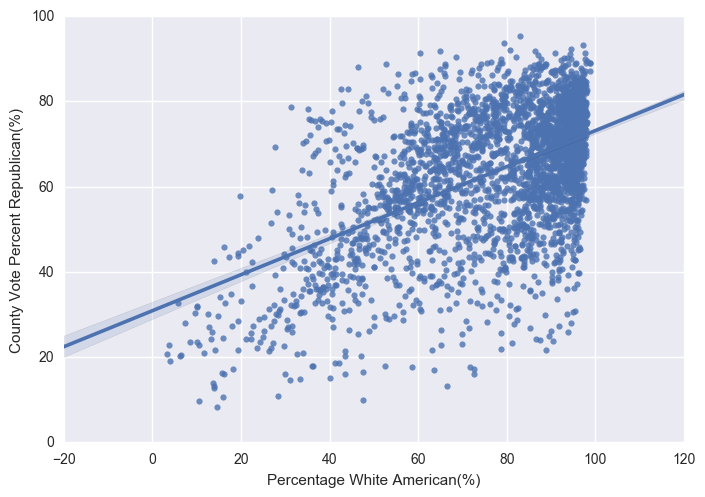

In [321]:
ax = sns.regplot(combined_5.white_am, combined_5.per_gop)
ax.set(xlabel = 'Percentage White American(%)', ylabel = 'County Vote Percent Republican(%)')
plt.show()
# It's scattered, but there is stil a strong correlation between percentage white 
# population and Republican vote. 

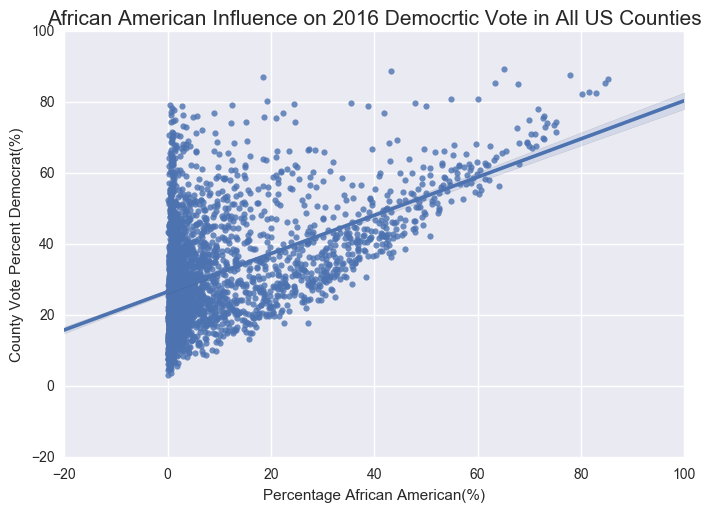

In [322]:
ax = sns.regplot(combined_5.af_am, combined_5.per_dem)
ax.set(xlabel = 'Percentage African American(%)', ylabel = 'County Vote Percent Democrat(%)')
ax.set_title('African American Influence on 2016 Democrtic Vote in All US Counties', fontsize=15)
plt.show()

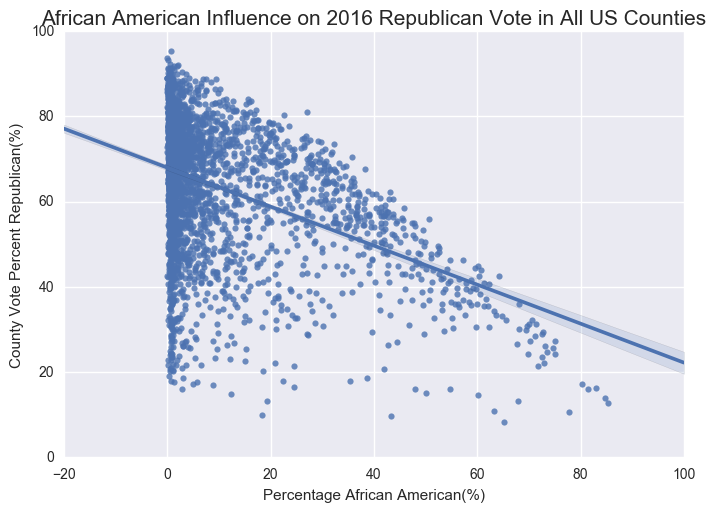

In [323]:
ax = sns.regplot(combined_5.af_am, combined_5.per_gop)
ax.set(xlabel = 'Percentage African American(%)', ylabel = 'County Vote Percent Republican(%)')
ax.set_title('African American Influence on 2016 Republican Vote in All US Counties', fontsize=15)
plt.show()

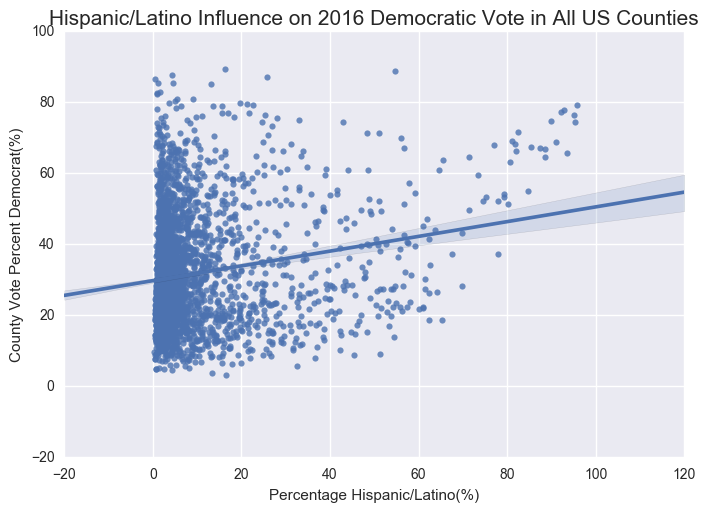

In [324]:
ax = sns.regplot(combined_5.hisp_lat_am, combined_5.per_dem)
ax.set(xlabel = 'Percentage Hispanic/Latino(%)', ylabel = 'County Vote Percent Democrat(%)')
ax.set_title('Hispanic/Latino Influence on 2016 Democratic Vote in All US Counties', fontsize=15)
plt.show()

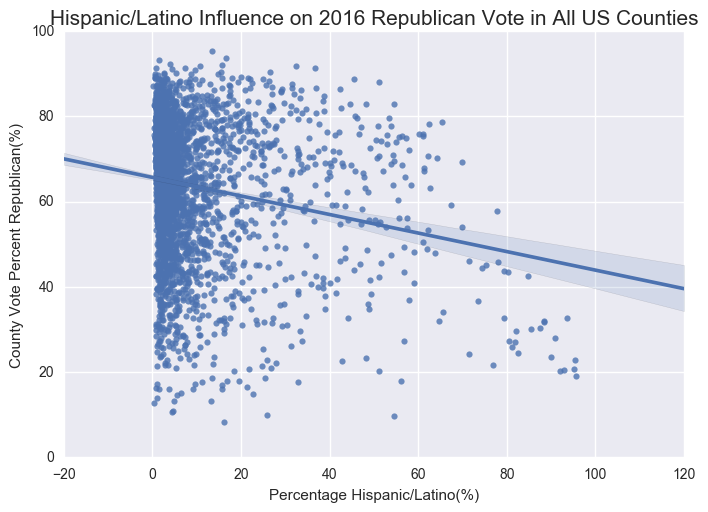

In [325]:
ax = sns.regplot(combined_5.hisp_lat_am, combined_5.per_gop)
ax.set(xlabel = 'Percentage Hispanic/Latino(%)', ylabel = 'County Vote Percent Republican(%)')
ax.set_title('Hispanic/Latino Influence on 2016 Republican Vote in All US Counties', fontsize=15)
plt.show()
# A correlation is there, but it's not that strong due to the sheer amount of 
# counties with little hispanic/latino population.

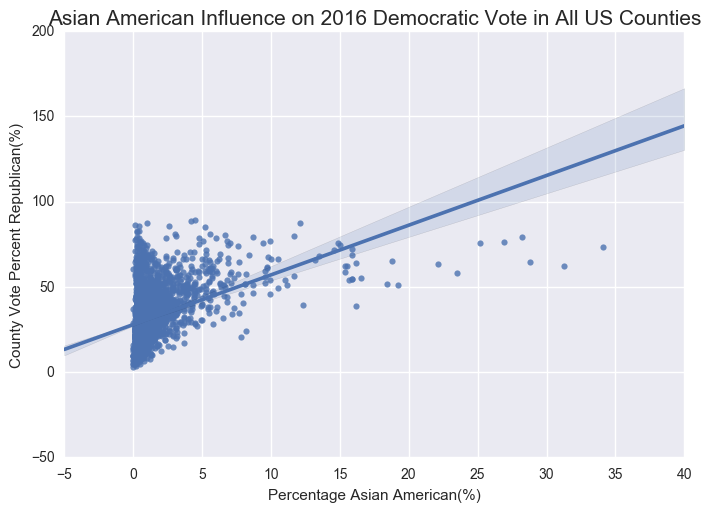

In [326]:
ax = sns.regplot(combined_5.asian_am, combined_5.per_dem)
ax.set(xlabel = 'Percentage Asian American(%)', ylabel = 'County Vote Percent Republican(%)')
ax.set_title('Asian American Influence on 2016 Democratic Vote in All US Counties', fontsize=15)
plt.show()

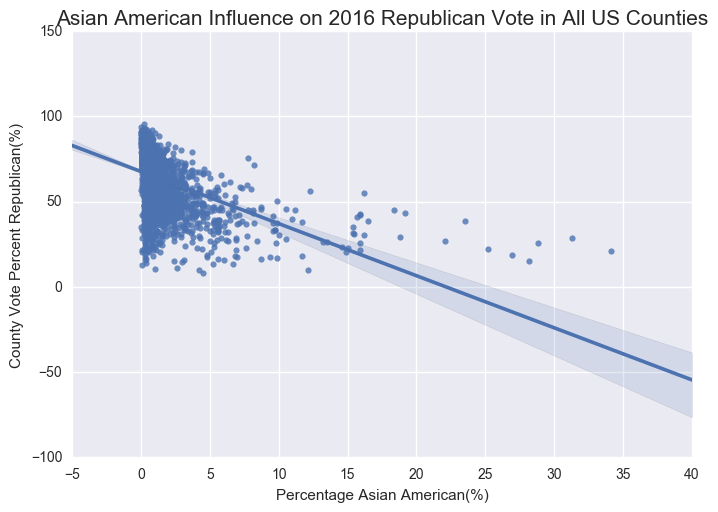

In [327]:
ax = sns.regplot(combined_5.asian_am, combined_5.per_gop)
ax.set(xlabel = 'Percentage Asian American(%)', ylabel = 'County Vote Percent Republican(%)')
ax.set_title('Asian American Influence on 2016 Republican Vote in All US Counties', fontsize=15)
plt.show()

## Swing States

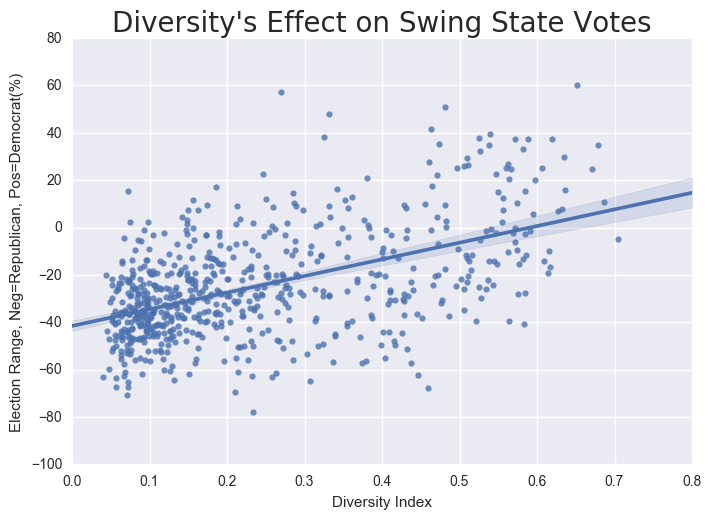

In [145]:
ax = sns.regplot(swing_states.div_index, swing_states.election_range)
ax.set(xlabel = 'Diversity Index', ylabel = 'Election Range, Neg=Republican, Pos=Democrat(%)')
ax.set_title("Diversity's Effect on Swing State Votes", fontsize=20, fontname='Ubuntu')
plt.show()

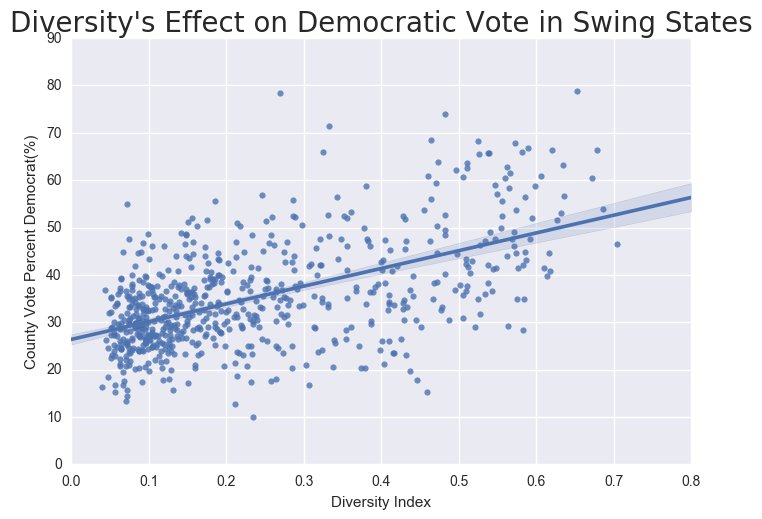

In [146]:
ax = sns.regplot(swing_states.div_index, swing_states.per_dem)
ax.set(xlabel = 'Diversity Index', ylabel = 'County Vote Percent Democrat(%)')
ax.set_title("Diversity's Effect on Democratic Vote in Swing States", fontsize=20, fontname='Ubuntu')
plt.show()

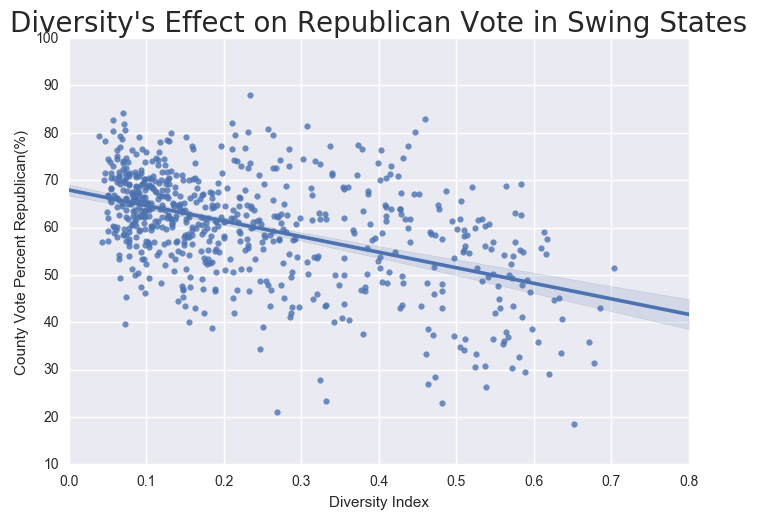

In [147]:
ax = sns.regplot(swing_states.div_index, swing_states.per_gop)
ax.set(xlabel = 'Diversity Index', ylabel = 'County Vote Percent Republican(%)')
ax.set_title("Diversity's Effect on Republican Vote in Swing States", fontsize=20, fontname='Ubuntu')
plt.show()

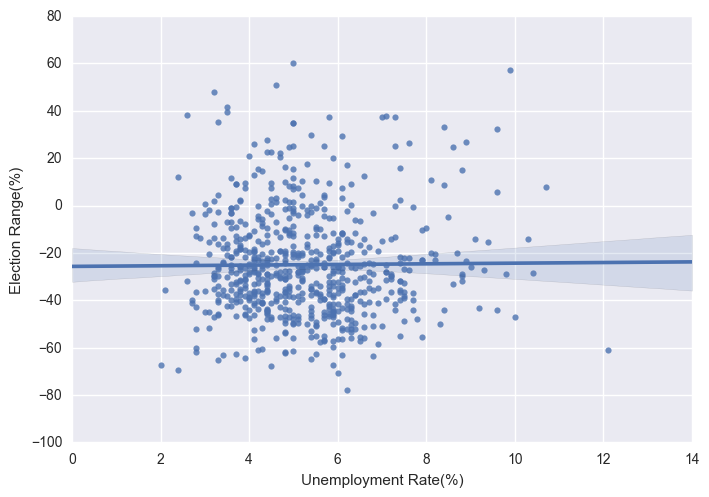

In [148]:
ax = sns.regplot(swing_states.ue_rate, swing_states.election_range)
ax.set(xlabel = 'Unemployment Rate(%)', ylabel = 'Election Range(%)')
plt.show()

In [149]:
# No discernable realtionship for unemployment in the swing states, just as in the overall dataset.

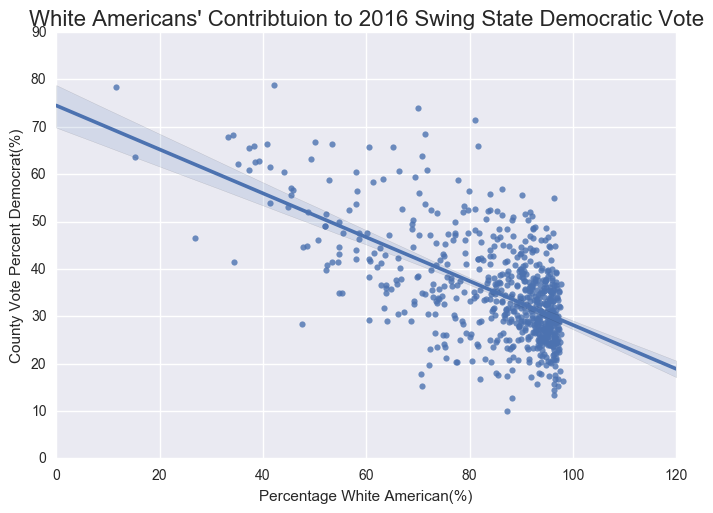

In [150]:
ax = sns.regplot(swing_states.white_am, swing_states.per_dem)
ax.set(xlabel = 'Percentage White American(%)', ylabel = 'County Vote Percent Democrat(%)')
ax.set_title("White Americans' Contribtuion to 2016 Swing State Democratic Vote", fontsize=16)
plt.show()

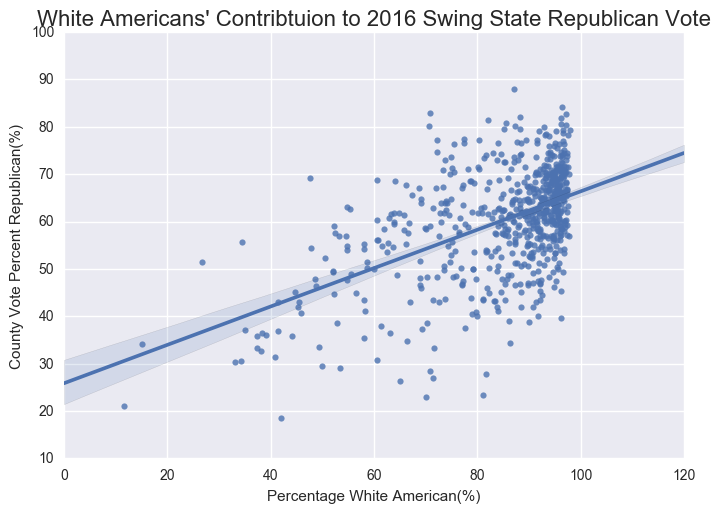

In [151]:
ax = sns.regplot(swing_states.white_am, swing_states.per_gop)
ax.set(xlabel = 'Percentage White American(%)', ylabel = 'County Vote Percent Republican(%)')
ax.set_title("White Americans' Contribtuion to 2016 Swing State Republican Vote", fontsize=16)
plt.show()

In [152]:
# Look for how incomes of white americans influence how they vote.

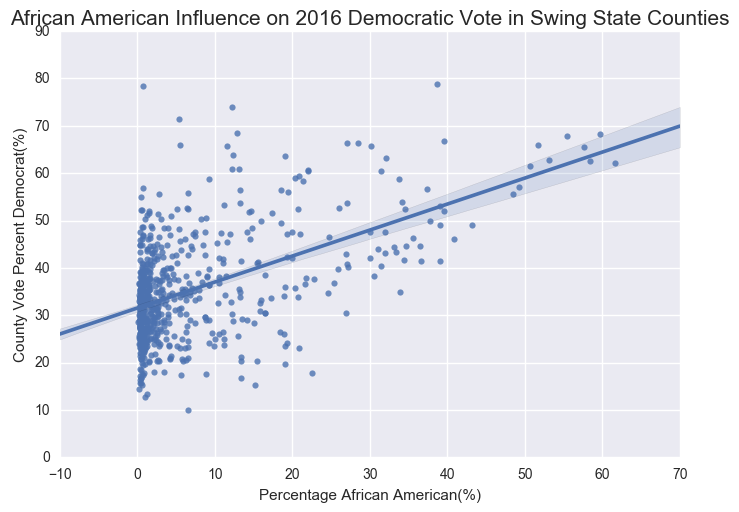

In [153]:
ax = sns.regplot(swing_states.af_am, swing_states.per_dem)
ax.set(xlabel = 'Percentage African American(%)', ylabel = 'County Vote Percent Democrat(%)')
ax.set_title('African American Influence on 2016 Democratic Vote in Swing State Counties', fontsize=15)
plt.show()

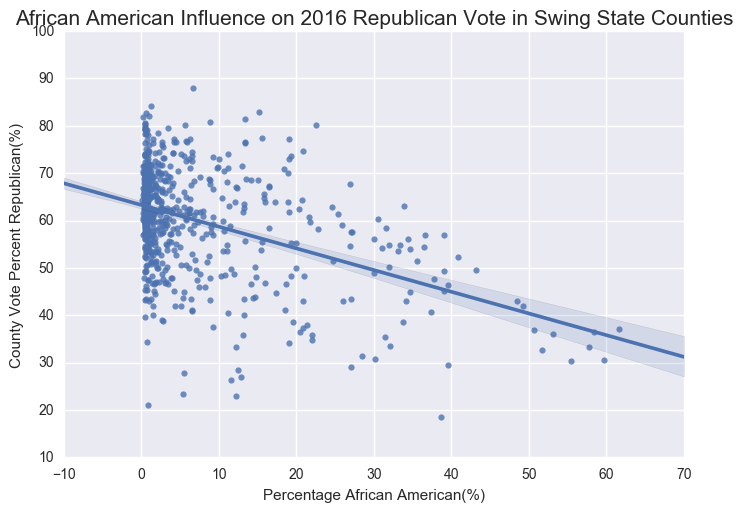

In [154]:
ax = sns.regplot(swing_states.af_am, swing_states.per_gop)
ax.set(xlabel = 'Percentage African American(%)', ylabel = 'County Vote Percent Republican(%)')
ax.set_title('African American Influence on 2016 Republican Vote in Swing State Counties', fontsize=15)
plt.show()

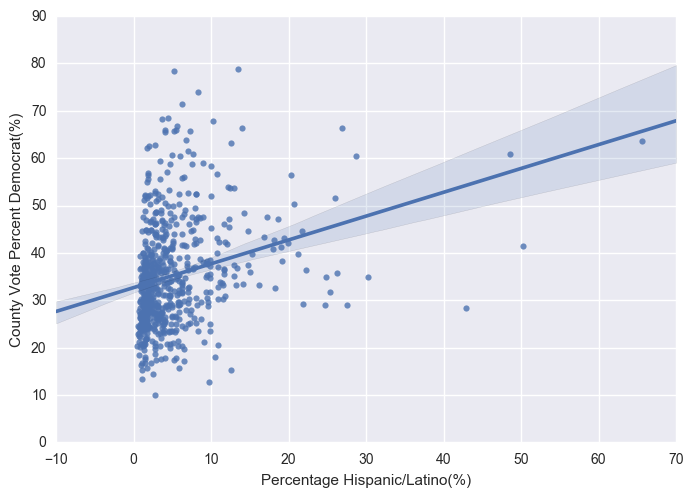

In [155]:
ax = sns.regplot(swing_states.hisp_lat_am, swing_states.per_dem)
ax.set(xlabel = 'Percentage Hispanic/Latino(%)', ylabel = 'County Vote Percent Democrat(%)')
plt.show()

In [156]:
# Again, a scattered, but string correlation.

In [157]:
# The change in the uninsured rate does not appear to have benefitted Democrats, 
# but does appear to have benefitted Republicans. 

# Influence of Education 

In [158]:
edu.columns

Index([                           u'FIPS Code',
                                      u'State',
                                  u'Area name',
                       u'less_hs_diploma_2000',
                       u'hs_diploma_only_2000',
                          u'less_4_years_2000',
                       u'four_or_ higher_2000',
          u'per_less_high_school diploma_2000',
                   u'per_hs_diploma_only_2000',
                      u'per_less_4_years_2000',
                   u'per_four_or_ higher_2000',
           u'less_high_school_diploma_2011_15',
                    u'hs_diploma_only_2011_15',
                       u'less_4_years_2011_15',
                    u'four_or_ higher_2011_15',
       u'per_less_high_school_diploma_2011_15',
                u'per_hs_diploma_only_2011_15',
                   u'per_less_4_years_2011_15',
                 u'per_four_or_higher_2011_15',
                               u'county_state'],
      dtype='object')

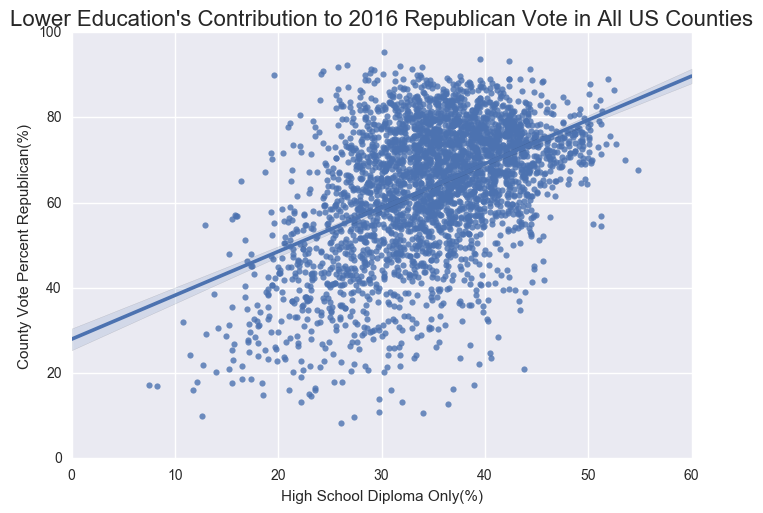

In [328]:
ax = sns.regplot(combined_5.per_hs_diploma_only_2011_15, combined_5.per_gop)
ax.set(xlabel = 'High School Diploma Only(%)', ylabel = 'County Vote Percent Republican(%)')
ax.set_title("Lower Education's Contribution to 2016 Republican Vote in All US Counties", fontsize=16)
plt.show()

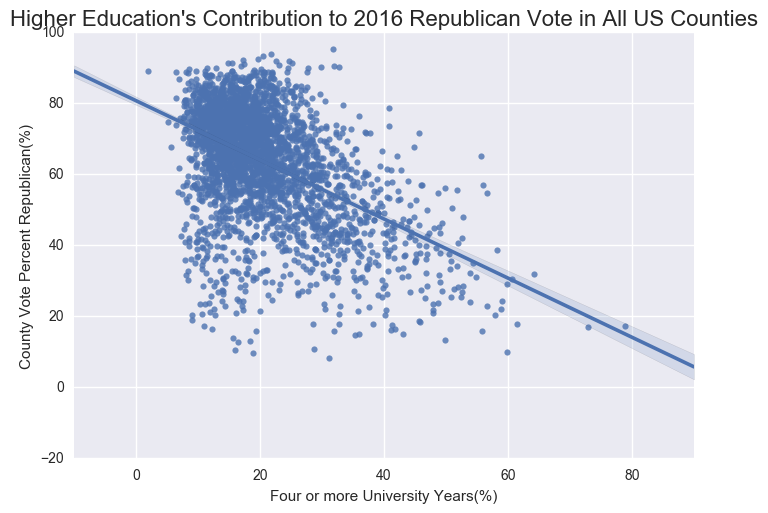

In [329]:
ax = sns.regplot(combined_5.per_four_or_higher_2011_15, combined_5.per_gop)
ax.set(xlabel = 'Four or more University Years(%)', ylabel = 'County Vote Percent Republican(%)')
ax.set_title("Higher Education's Contribution to 2016 Republican Vote in All US Counties", fontsize=16)
plt.show()

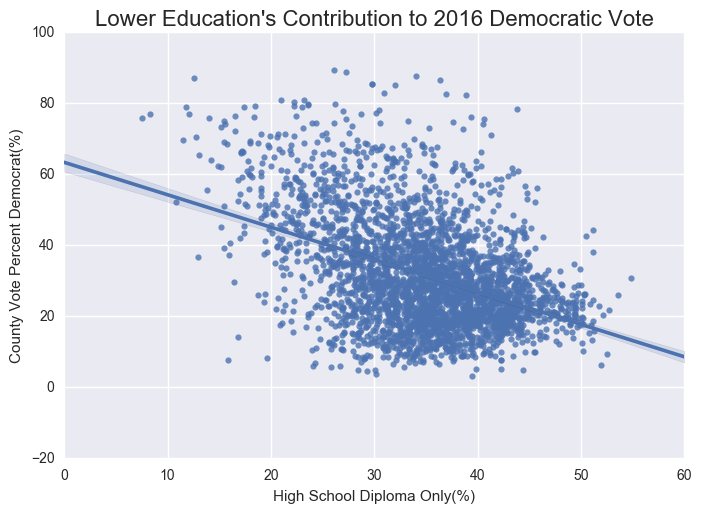

In [330]:
ax = sns.regplot(combined_5.per_hs_diploma_only_2011_15, combined_5.per_dem)
ax.set(xlabel = 'High School Diploma Only(%)', ylabel = 'County Vote Percent Democrat(%)')
ax.set_title("Lower Education's Contribution to 2016 Democratic Vote", fontsize=16)
plt.show()

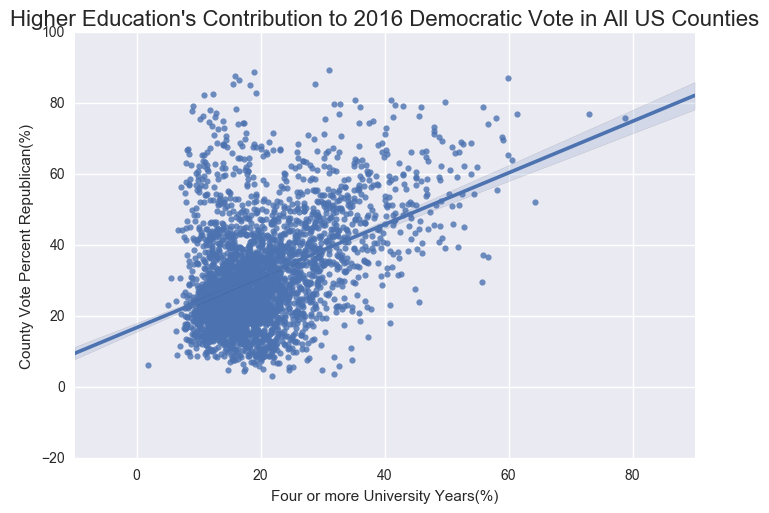

In [331]:
ax = sns.regplot(combined_5.per_four_or_higher_2011_15, combined_5.per_dem)
ax.set(xlabel = 'Four or more University Years(%)', ylabel = 'County Vote Percent Republican(%)')
ax.set_title("Higher Education's Contribution to 2016 Democratic Vote in All US Counties", fontsize=16)
plt.show()

## Swing States

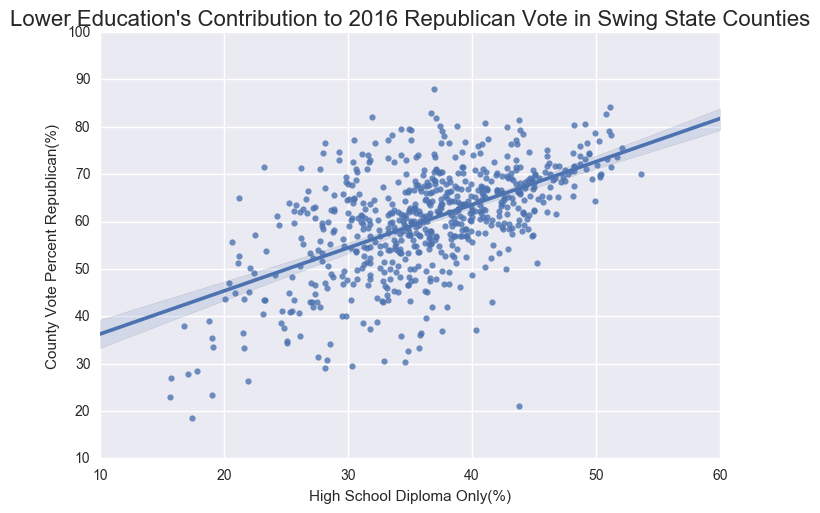

In [163]:
ax = sns.regplot(swing_states.per_hs_diploma_only_2011_15, swing_states.per_gop)
ax.set(xlabel = 'High School Diploma Only(%)', ylabel = 'County Vote Percent Republican(%)')
ax.set_title("Lower Education's Contribution to 2016 Republican Vote in Swing State Counties", fontsize=16)
plt.show()

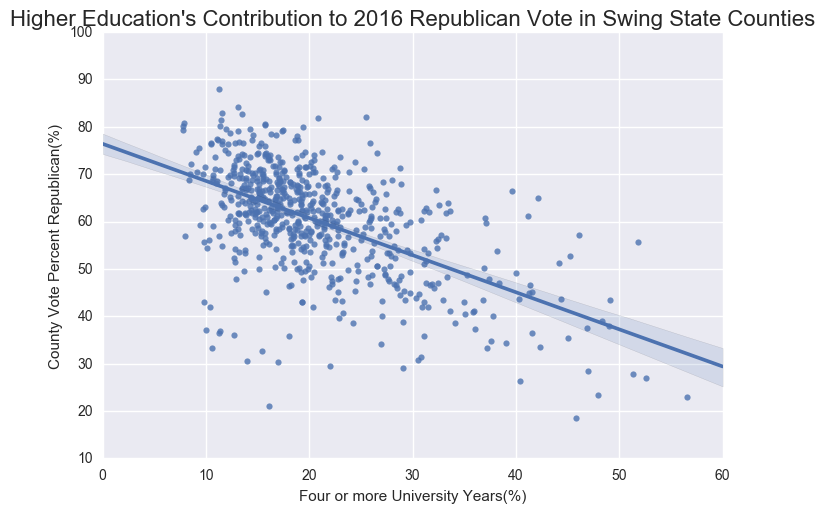

In [164]:
ax = sns.regplot(swing_states.per_four_or_higher_2011_15, swing_states.per_gop)
ax.set(xlabel = 'Four or more University Years(%)', ylabel = 'County Vote Percent Republican(%)')
ax.set_title("Higher Education's Contribution to 2016 Republican Vote in Swing State Counties", fontsize=16)
plt.show()

In [165]:
# If a county has a higher percentage of people with only a hs diploma, then more likely
# to vote Republican. If a county has a higher proportion of 4+ college degrees, then 
# more likely to go Democrat. Pretty much aligns with Nat Silver's argument. 

In [332]:
combined_5.labor_force.head()

0     10423.0
1     26186.0
2     15972.0
3    217281.0
4      4266.0
Name: labor_force, dtype: float64

## Labor Force

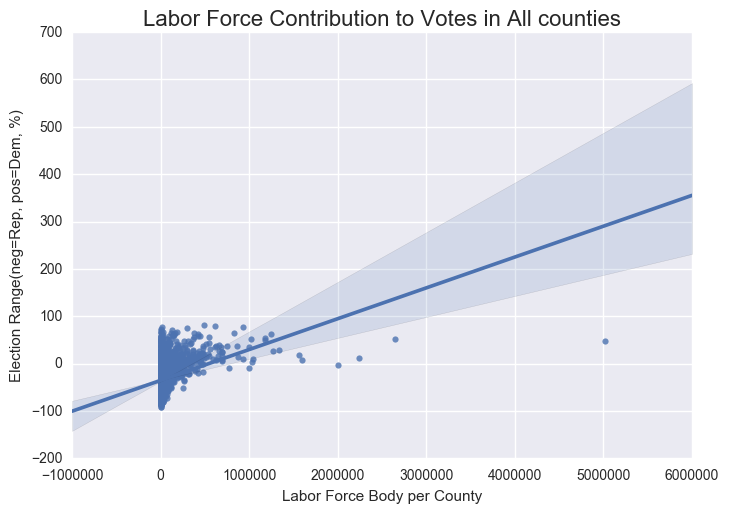

In [333]:
ax = sns.regplot(combined_5.labor_force, combined_5.election_range)
ax.set(xlabel = 'Labor Force Body per County', ylabel = 'Election Range(neg=Rep, pos=Dem, %)')
ax.set_title("Labor Force Contribution to Votes in All counties", fontsize=16)
plt.show()

## Population 

In [386]:
combined_5.head(1)

,county_state,state,county,est_pop_2015,pop_change_2015,int_mig_2015,dom_mig_2015,mig_2015,FIPS Code,State,...,per_point_diff,state_abbr,county_name_r,election_range,slight_dem,slight_gop,med_dem,med_gop,strong_dem,strong_gop
0,"Abbeville County, SC",SC,Abbeville County,24932,6,22,-12,10,45001.0,SC,...,28.25,SC,Abbeville County,-28.254383,False,False,False,False,False,True


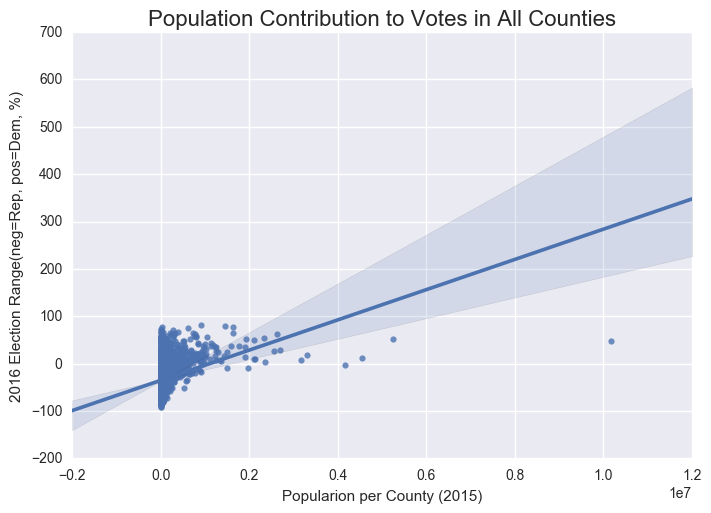

In [389]:
ax = sns.regplot(combined_5.est_pop_2015, combined_5.election_range)
ax.set(xlabel = 'Popularion per County (2015)', ylabel = '2016 Election Range(neg=Rep, pos=Dem, %)')
ax.set_title("Population Contribution to Votes in All Counties", fontsize=16)
plt.show()

In [388]:
# Population size per county does correlate with vote.

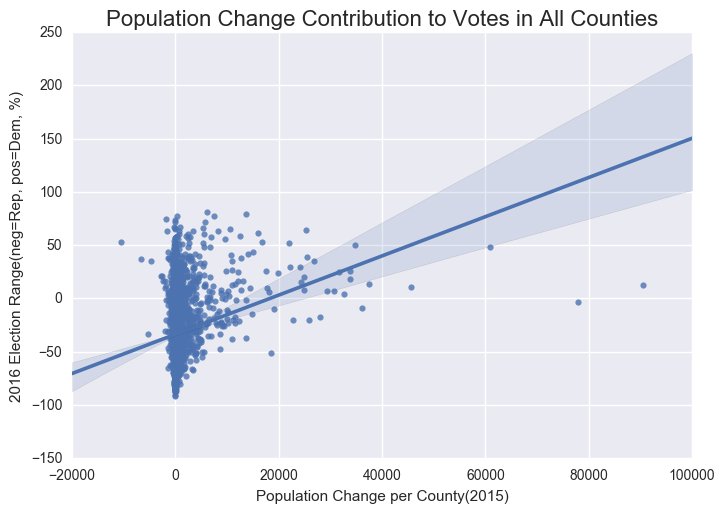

In [391]:
ax = sns.regplot(combined_5.pop_change_2015, combined_5.election_range)
ax.set(xlabel = 'Population Change per County(2015)', ylabel = '2016 Election Range(neg=Rep, pos=Dem, %)')
ax.set_title("Population Change Contribution to Votes in All Counties", fontsize=16)
plt.show()

In [ ]:
# Counties that experienced a positve change in population saw a boost for Dems.

In [168]:
# Although there is that cluster towards zero, and the correlation is broad, there
# is still something there.

# Modeling

## Regression

Most predictive features for counties' vote found through EDA:

(note that these variables, sometimes by their nature, don't necessarily follow a normal distribution)

Percentage White American population

Percentage African American population 

Percentage Asian American population

Percentage High School Diploma only

Percentage Four or more years of University

In [392]:
combined_5.columns

Index([                        u'county_state',
                                      u'state',
                                     u'county',
                               u'est_pop_2015',
                            u'pop_change_2015',
                               u'int_mig_2015',
                               u'dom_mig_2015',
                                   u'mig_2015',
                                  u'FIPS Code',
                                      u'State',
                                  u'Area name',
                       u'less_hs_diploma_2000',
                       u'hs_diploma_only_2000',
                          u'less_4_years_2000',
                       u'four_or_ higher_2000',
          u'per_less_high_school diploma_2000',
                   u'per_hs_diploma_only_2000',
                      u'per_less_4_years_2000',
                   u'per_four_or_ higher_2000',
           u'less_high_school_diploma_2011_15',
                    u'hs_diploma_only_20

In [399]:
modeling = combined_5.drop(combined_5[[0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,34,35,36,37,38,39,40,52,53]], axis=1)

In [400]:
modeling.head()

,est_pop_2015,pop_change_2015,per_hs_diploma_only_2011_15,per_four_or_higher_2011_15,div_index,af_am,native_2013,asian_am,pac_am,two_or_more_races,...,per_gop,diff,per_point_diff,election_range,slight_dem,slight_gop,med_dem,med_gop,strong_dem,strong_gop
0,24932,6,37.5,12.3,0.445417,28.2,0.3,0.4,0.0,1.3,...,62.868333,"3,030",28.25,-28.254383,False,False,False,False,False,True
1,62577,79,39.2,10.5,0.355956,18.3,0.3,0.4,0.0,1.3,...,77.262105,"15,521",56.67,-56.674943,False,False,False,False,False,False
2,32973,-25,39.9,18.8,0.539878,28.0,0.6,0.6,0.2,1.5,...,54.471596,"1,845",11.71,-11.710568,False,False,False,True,False,False
3,434211,7364,21.4,37.1,0.256622,1.3,0.8,2.6,0.2,2.6,...,47.931611,"18,072",9.24,-9.239878,False,True,False,False,False,False
4,7228,-189,44.7,15.3,0.054921,0.2,0.1,0.4,0.0,0.7,...,65.336526,"1,329",35.36,-35.355148,False,False,False,False,False,True


In [403]:
modeling.isnull().sum()

est_pop_2015                    0
pop_change_2015                 0
per_hs_diploma_only_2011_15     9
per_four_or_higher_2011_15      9
div_index                      13
af_am                          13
native_2013                    13
asian_am                       13
pac_am                         13
two_or_more_races              13
hisp_lat_am                    13
labor_force                    46
employed                       46
unemployed                     46
ue_rate                        46
votes_dem                      46
votes_gop                      46
total_votes                    46
per_dem                        46
per_gop                        46
diff                           46
per_point_diff                 46
election_range                 46
slight_dem                     46
slight_gop                     46
med_dem                        46
med_gop                        46
strong_dem                     46
strong_gop                     46
dtype: int64

In [404]:
modeling.dropna(inplace=True)
#Only 46 isn't too significant.

In [405]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import confusion_matrix, mean_squared_error

In [406]:
lr = LinearRegression()

In [407]:
modeling.columns

Index([               u'est_pop_2015',             u'pop_change_2015',
       u'per_hs_diploma_only_2011_15',  u'per_four_or_higher_2011_15',
                         u'div_index',                       u'af_am',
                       u'native_2013',                    u'asian_am',
                            u'pac_am',           u'two_or_more_races',
                       u'hisp_lat_am',                 u'labor_force',
                          u'employed',                  u'unemployed',
                           u'ue_rate',                   u'votes_dem',
                         u'votes_gop',                 u'total_votes',
                           u'per_dem',                     u'per_gop',
                              u'diff',              u'per_point_diff',
                    u'election_range',                  u'slight_dem',
                        u'slight_gop',                     u'med_dem',
                           u'med_gop',                  u'strong_dem',
      

In [433]:
X = modeling[[0,1,2,3,4,5,6,7,8,9,10,11]] 
y = modeling['election_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [434]:
X.head(0)

,est_pop_2015,pop_change_2015,per_hs_diploma_only_2011_15,per_four_or_higher_2011_15,div_index,af_am,native_2013,asian_am,pac_am,two_or_more_races,hisp_lat_am,labor_force


In [435]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

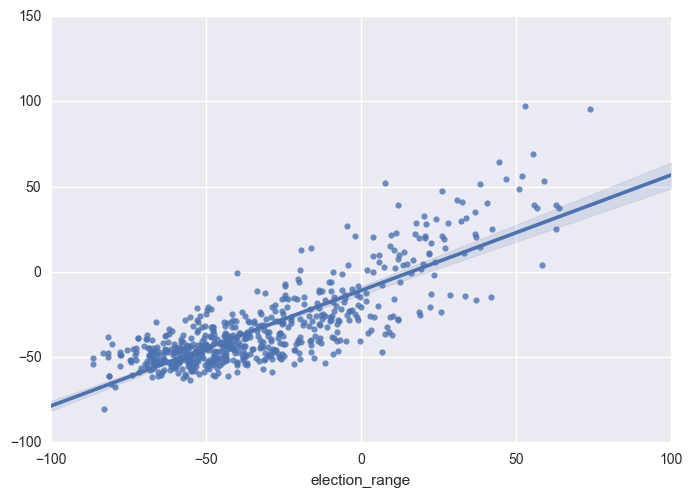

In [436]:
sns.regplot(y_test, y_pred)
plt.show()

In [437]:
lr.score(X_train, y_train)

0.66806575723520978

In [438]:
cross_val_score(lr, X_train, y_train, cv=5)

array([ 0.63092269,  0.66163328,  0.61703702,  0.65413031,  0.67655546])

## Model Swing States 

In [448]:
s_modeling = swing_states.drop(swing_states[[0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,34,35,36,37,38,39,40,52,53]], axis=1)

In [449]:
swing_states.head(0)

,county_state,state,county,est_pop_2015,pop_change_2015,int_mig_2015,dom_mig_2015,mig_2015,FIPS Code,State,...,per_point_diff,state_abbr,county_name_r,election_range,slight_dem,slight_gop,med_dem,med_gop,strong_dem,strong_gop


In [450]:
s_modeling.head(0)

,est_pop_2015,pop_change_2015,per_hs_diploma_only_2011_15,per_four_or_higher_2011_15,div_index,af_am,native_2013,asian_am,pac_am,two_or_more_races,...,per_gop,diff,per_point_diff,election_range,slight_dem,slight_gop,med_dem,med_gop,strong_dem,strong_gop


In [451]:
X = s_modeling[[0,1,2,3,4,5,6,7,8,9,10,11]] 
y = s_modeling['election_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [452]:
X.head()

,est_pop_2015,pop_change_2015,per_hs_diploma_only_2011_15,per_four_or_higher_2011_15,div_index,af_am,native_2013,asian_am,pac_am,two_or_more_races,hisp_lat_am,labor_force
4,7228,-189,44.7,15.3,0.054921,0.2,0.1,0.4,0.0,0.7,1.5,4266.0
9,3796,-75,39.1,15.1,0.058873,0.3,0.5,0.6,0.0,0.6,1.1,2300.0
40,13886,-175,42.1,16.3,0.159016,1.5,0.6,0.5,0.3,1.0,5.8,7727.0
75,12529,-99,36.3,17.6,0.074125,0.6,0.3,0.3,0.0,1.1,1.6,6255.0
106,5773,-20,42.3,14.3,0.049200,0.4,0.2,0.5,0.0,0.7,0.9,3251.0


In [453]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

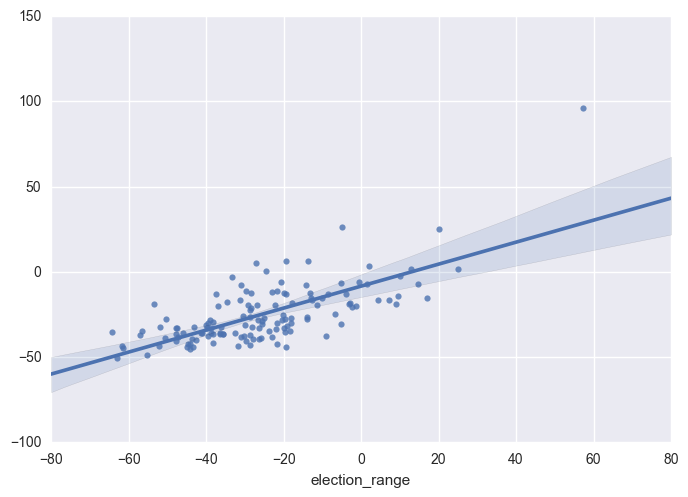

In [454]:
sns.regplot(y_test, y_pred)
plt.show()

In [455]:
lr.score(X_train, y_train)
# Right around the same R^2 score as all counties.

0.66209473643341399

In [457]:
cross_val_score(lr, X_train, y_train, cv=5)

array([ 0.4705808 ,  0.71532307,  0.57896561,  0.6657444 ,  0.64447623])

## Classification

Now we want to see what features classify a county into being "slight dem", "slight gop, "med_dem", "med_gop", "strong_dem", and "strong_gop."

In [458]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [459]:
vc = VotingClassifier
# Setting the number of neighbors to the square root of number of instances is a good 
# rule of thumb.
knn = KNeighborsClassifier(n_neighbors = 55)
rfc = RandomForestClassifier(max_depth = 5) 

In [460]:
modeling.head()

,est_pop_2015,pop_change_2015,per_hs_diploma_only_2011_15,per_four_or_higher_2011_15,div_index,af_am,native_2013,asian_am,pac_am,two_or_more_races,...,per_gop,diff,per_point_diff,election_range,slight_dem,slight_gop,med_dem,med_gop,strong_dem,strong_gop
0,24932,6,37.5,12.3,0.445417,28.2,0.3,0.4,0.0,1.3,...,62.868333,"3,030",28.25,-28.254383,False,False,False,False,False,True
1,62577,79,39.2,10.5,0.355956,18.3,0.3,0.4,0.0,1.3,...,77.262105,"15,521",56.67,-56.674943,False,False,False,False,False,False
2,32973,-25,39.9,18.8,0.539878,28.0,0.6,0.6,0.2,1.5,...,54.471596,"1,845",11.71,-11.710568,False,False,False,True,False,False
3,434211,7364,21.4,37.1,0.256622,1.3,0.8,2.6,0.2,2.6,...,47.931611,"18,072",9.24,-9.239878,False,True,False,False,False,False
4,7228,-189,44.7,15.3,0.054921,0.2,0.1,0.4,0.0,0.7,...,65.336526,"1,329",35.36,-35.355148,False,False,False,False,False,True


In [463]:
dummies = pd.get_dummies(modeling[['slight_dem','slight_gop','med_dem','med_gop','strong_dem','strong_gop']])

In [464]:
c_modeling = modeling.join(dummies)
c_modeling = c_modeling.reset_index()
c_modeling = c_modeling.drop(c_modeling[[0]], axis=1)

In [465]:
c_modeling.head()

,est_pop_2015,pop_change_2015,per_hs_diploma_only_2011_15,per_four_or_higher_2011_15,div_index,af_am,native_2013,asian_am,pac_am,two_or_more_races,...,slight_gop_False,slight_gop_True,med_dem_False,med_dem_True,med_gop_False,med_gop_True,strong_dem_False,strong_dem_True,strong_gop_False,strong_gop_True
0,24932,6,37.5,12.3,0.445417,28.2,0.3,0.4,0.0,1.3,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,62577,79,39.2,10.5,0.355956,18.3,0.3,0.4,0.0,1.3,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,32973,-25,39.9,18.8,0.539878,28.0,0.6,0.6,0.2,1.5,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,434211,7364,21.4,37.1,0.256622,1.3,0.8,2.6,0.2,2.6,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,7228,-189,44.7,15.3,0.054921,0.2,0.1,0.4,0.0,0.7,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [466]:
c_modeling.columns

Index([               u'est_pop_2015',             u'pop_change_2015',
       u'per_hs_diploma_only_2011_15',  u'per_four_or_higher_2011_15',
                         u'div_index',                       u'af_am',
                       u'native_2013',                    u'asian_am',
                            u'pac_am',           u'two_or_more_races',
                       u'hisp_lat_am',                 u'labor_force',
                          u'employed',                  u'unemployed',
                           u'ue_rate',                   u'votes_dem',
                         u'votes_gop',                 u'total_votes',
                           u'per_dem',                     u'per_gop',
                              u'diff',              u'per_point_diff',
                    u'election_range',                  u'slight_dem',
                        u'slight_gop',                     u'med_dem',
                           u'med_gop',                  u'strong_dem',
      

## First test for slight dem and slight gop.

In [473]:
# First try KNN for just slight dem and slight gop.
X = c_modeling[[0,1,2,3,4,5,6,7,8,9,10,11]]
y = c_modeling[[29,30,31,32]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [474]:
X.head()

,est_pop_2015,pop_change_2015,per_hs_diploma_only_2011_15,per_four_or_higher_2011_15,div_index,af_am,native_2013,asian_am,pac_am,two_or_more_races,hisp_lat_am,labor_force
0,24932,6,37.5,12.3,0.445417,28.2,0.3,0.4,0.0,1.3,1.2,10423.0
1,62577,79,39.2,10.5,0.355956,18.3,0.3,0.4,0.0,1.3,2.0,26186.0
2,32973,-25,39.9,18.8,0.539878,28.0,0.6,0.6,0.2,1.5,9.0,15972.0
3,434211,7364,21.4,37.1,0.256622,1.3,0.8,2.6,0.2,2.6,7.5,217281.0
4,7228,-189,44.7,15.3,0.054921,0.2,0.1,0.4,0.0,0.7,1.5,4266.0


In [475]:
y.head()

,slight_dem_False,slight_dem_True,slight_gop_False,slight_gop_True
0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0


In [476]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=55, p=2,
           weights='uniform')

In [477]:
y_pred = knn.predict(X_test)

In [478]:
print knn.score(X_train,y_train)
print accuracy_score(y_test, y_pred)
print precision_score(y_test,y_pred)
print recall_score(y_test,y_pred)
print cross_val_score(knn, X_train, y_train, cv=5)

0.892871526379
0.901771336554
0.904184202406
0.950885668277
[ 0.90342052  0.90140845  0.8832998   0.875       0.90120968]


/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1

## Now test for medium gop and medium dem.

In [479]:
#KNN for med_dem and med_gop
X = c_modeling[[0,1,2,3,4,5,6,7,8,9,10,11]]
y = c_modeling[[33,34,35,36]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_pred = knn.predict(X_test)

In [480]:
print knn.score(X_train,y_train)
print accuracy_score(y_test, y_pred)
print precision_score(y_test,y_pred)
print recall_score(y_test,y_pred)
print cross_val_score(knn, X_train, y_train, cv=5)

0.826016915022
0.811594202899
0.822289383131
0.905797101449
[ 0.82293763  0.81891348  0.81488934  0.83870968  0.83467742]


/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1

## Now test for strong gop and strong dem.

In [481]:
#KNN for med_dem and med_gop
X = c_modeling[[0,1,2,3,4,5,6,7,8,9,10,11]]
y = c_modeling[[37,38,39,40]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_pred = knn.predict(X_test)

In [482]:
print knn.score(X_train,y_train)
print accuracy_score(y_test, y_pred)
print precision_score(y_test,y_pred)
print recall_score(y_test,y_pred)

0.627064035441
0.631239935588
0.684638044191
0.815619967794


/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1

Modeling for the "strong" counties of 25-50% is not that predictive. 

In [ ]:
# Model this precision v recall: http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

In [647]:
## Random Forests

# RFC for slight dem and slight gop

In [483]:
X = c_modeling[[0,1,2,3,4,5,6,7,8,9,10,11]]
y = c_modeling[[29,30,31,32]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [484]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [485]:
y_pred = rfc.predict(X_test)

In [486]:
print rfc.score(X_train,y_train)
print accuracy_score(y_test, y_pred)
print precision_score(y_test,y_pred)
print recall_score(y_test, y_pred)
print cross_val_score(rfc, X_train, y_train, cv=5)

0.893677003625
0.901771336554
0.904184202406
0.950885668277


/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1

[ 0.90342052  0.89939638  0.8832998   0.875       0.90120968]


# RFC for medium dem and medium gop

In [487]:
X = c_modeling[[0,1,2,3,4,5,6,7,8,9,10,11]]
y = c_modeling[[33,34,35,36]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [488]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [489]:
y_pred = rfc.predict(X_test)

In [490]:
print rfc.score(X_train,y_train)
print accuracy_score(y_test, y_pred)
print precision_score(y_test,y_pred)
print recall_score(y_test, y_pred)
print cross_val_score(rfc, X_train, y_train, cv=5)

0.831252517116
0.814814814815
0.891930913053
0.907407407407


/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1

[ 0.82696177  0.81086519  0.81287726  0.84475806  0.83669355]


# RFC for strong dem and strong gop

In [491]:
X = c_modeling[[0,1,2,3,4,5,6,7,8,9,10,11]]
y = c_modeling[[37,38,39,40]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [492]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [493]:
y_pred = rfc.predict(X_test)

In [494]:
print rfc.score(X_train,y_train)
print accuracy_score(y_test, y_pred)
print precision_score(y_test,y_pred)
print recall_score(y_test, y_pred)
print cross_val_score(rfc, X_train, y_train, cv=5)

0.638340716875
0.62962962963
0.766102932885
0.814814814815


/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1

[ 0.56740443  0.64185111  0.65593561  0.67540323  0.60483871]


In [495]:
# Just like in KNN, not a good classifier for "strong counties." 

In [219]:
## Problem statement: What are the economic and demographic factors we can use to predict
## whether a county votes Democrat or Republican? More specifically, how do these factors 
## affect the margin of a Democrat or Republican winning the vote in a swing state county?
## Furthermore, are the parties becoming racial identity parties--how much does the data 
## convey this? 

## Hypothesis: 

In [220]:
## Look closely at the election week's coverage and how to build off that
## How many misleading data driven stories have their been? Atlantic--said most predicitive 
## question was whether Obama was born here (bunch of false positives)==precision vs recall 
## problem. Look at HOW METRICS HAVE BEEN ABUSED. 

## DEBUNK these stories. 